## Problem Statement 

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

Lead Conversion Process - Demonstrated as a funnel
Lead Conversion Process - Demonstrated as a funnel
As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

 

#### Data
You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).

 

#### Goals of the Case Study
There are quite a few goals for this case study:

1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
2. There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

## Results Expected

1. A well-commented Jupyter notebook with at least the logistic regression model, the conversion predictions and evaluation metrics.
2. The word document filled with solutions to all the problems.
3. The overall approach of the analysis in a presentation.
4. Mention the problem statement and the analysis approach briefly 
5. Explain the results in business terms
6. Include visualisations and summarise the most important results in the presentation
7. A brief summary report in 500 words explaining how you proceeded with the assignment and the learnings that you gathered.
 

You need to submit the following four components:

- Python commented file: Should include detailed comments and should not contain unnecessary pieces of code.
- Word File: Answer all the questions asked by the company in the word document provided.
- Presentation:  Make a presentation to present your analysis to the chief data scientist of your company (and thus you should include both technical and business aspects). The presentation should be concise, clear, and to the point. Submit the presentation after converting it into PDF format.
- PDF File: Write the summary report in a word file and submit it as a PDF.

## Step1: Importing necessary data 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd , numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
pd.set_option('display.max_columns', None) 

pd.set_option('display.max_rows', None)

In [4]:
lead_data = pd.read_csv("Leads.csv")

In [5]:
lead_data.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [6]:
lead_data.shape

(9240, 37)

In [7]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
# there are 7 numerical variables and rest 30 are categorical variables

In [9]:
# All are non-null culumns

In [10]:
lead_data.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [11]:
# as we can see total visits , total time spent on website , page view per visit has outliers

## Step 2 : Data Cleaning 

In [12]:
lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [13]:
lead_data.isnull().mean().sort_values(ascending = True)

Prospect ID                                      0.000000
I agree to pay the amount through cheque         0.000000
Get updates on DM Content                        0.000000
Update me on Supply Chain Content                0.000000
Receive More Updates About Our Courses           0.000000
Through Recommendations                          0.000000
Digital Advertisement                            0.000000
Newspaper                                        0.000000
X Education Forums                               0.000000
A free copy of Mastering The Interview           0.000000
Magazine                                         0.000000
Search                                           0.000000
Newspaper Article                                0.000000
Last Notable Activity                            0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Total Time Spent on Website                      0.000000
Converted     

1. columns name which is having greater than 40 % missing value , we should drop that column
- Lead Quality                       --              0.515909
- Asymmetrique Activity Index        --             0.456494
- Asymmetrique Profile Index         --             0.456494
- Asymmetrique Activity Score        --             0.456494
- Asymmetrique Profile Score         ---             0.456494

2. Leads which is near to 30% missing value , later decide
- What is your current occupation        --           0.291126
- What matters most to you in choosing a course  --   0.293182
- Lead Profile            --                          0.293182
- Tags                    --                         0.362879
- Country                 --                         0.266342

In [14]:
# 1.Removing columns > 40% missing value

In [15]:
lead_data  = lead_data.loc[: , lead_data.isnull().mean() < 0.4]

In [16]:
lead_data.shape

(9240, 32)

In [17]:
# Columns which is having near to 30 % missing value

In [18]:
# Variable country is of no use in  our analysis and also having 26% missing value so drop it
lead_data.drop(['Country'], axis = 1, inplace = True)

In [19]:
# Variable city is of no use in  our analysis , so drop it
lead_data.drop(['City'], axis = 1, inplace = True)

In [20]:
# Tgas column is having high missing values , so no use , 36%
lead_data.drop(['Tags'], axis = 1, inplace = True) 

In [21]:
# As the column name "Prospect ID" and "Lead Number" is distinct value indicating no of rows , we can drop it 
lead_data.drop(['Prospect ID' , 'Lead Number'], axis = 1, inplace = True) 

In [22]:
lead_data.isnull().mean().sort_values(ascending = True)

Lead Origin                                      0.000000
I agree to pay the amount through cheque         0.000000
Get updates on DM Content                        0.000000
Update me on Supply Chain Content                0.000000
Receive More Updates About Our Courses           0.000000
Through Recommendations                          0.000000
Digital Advertisement                            0.000000
Newspaper                                        0.000000
X Education Forums                               0.000000
Newspaper Article                                0.000000
Magazine                                         0.000000
A free copy of Mastering The Interview           0.000000
Search                                           0.000000
Total Time Spent on Website                      0.000000
Converted                                        0.000000
Do Not Call                                      0.000000
Do Not Email                                     0.000000
Last Notable A

In [23]:
# Get the value counts of all the columns

for column in lead_data:
    print(lead_data[column].astype('category').value_counts())
    print('___________________________________________________')

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
___________________________________________________
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
blog                    1
testone                 1
welearnblog_Home        1
youtubechannel          1
Name: count, dtype: int64
___________________________________________________
Do Not Email
No     8506
Yes     734
Name: count, dtype: int64
___________________________________________________

In [24]:
# There are a few columns in which there is a level called 'Select' which basically means that the student had not selected the option for that particular column which is why it shows 'Select'. These values are as good as missing values and hence we need to identify the value counts of the level 'Select' in all the columns that it is present.

In [25]:
lead_data['Lead Profile'].astype('category').value_counts()

Lead Profile
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

In [26]:
# In "Lead profile" already 29 % is missing value , then slect is also treated as missing value , so total missing value is 44% + 29 % = 73% , which is huge so drop it .

In [27]:
lead_data['How did you hear about X Education'].value_counts()

How did you hear about X Education
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64

In [28]:
# In 'How did you hear about X Education' already 23 % is missing value ,then slect is also treated as missing value , so total missing value is 54% + 23 % = 77% , which is huge so drop it 

In [29]:
lead_data['Specialization'].value_counts()

Specialization
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [30]:
# In 'How did you hear about X Education' already 15 % is missing value ,then slect is also treated as missing value , so total missing value is 21% + 23 % , total 44% is missing value , but this vaiable is important for us ,so keep it.

In [31]:
# Compared to all three , we can remove ['How did you hear about X Education' , 'Lead Profile']

In [32]:
lead_data.drop(['How did you hear about X Education' , 'Lead Profile'], axis = 1, inplace = True) 

In [33]:
lead_data.shape

(9240, 25)

#### All of these should be dropped as they are not making impact on hot leads

99 % people want phone communication.
[Do Not Call]

99 % people want Better Career Prospects.['What matters most to you in choosing a course']

100% people dont want to pay through cheque , don't want updates on DM content , supply chain content , more updates on courses
[I agree to pay the amount through cheque
, Get updates on DM Content
, Update me on Supply Chain Content
. Receive More Updates About Our Courses
]
- 4 columns doesnt make any sense , so drop it

99 % leads come don't come through checking Magazine , through search , newspaper article , X Education Forums , Newspaper , 
Digital Advertisement.
[Search, Magazine , Newspaper Article , X Education Forums , Newspaper , Digital Advertisement]

Only 7 people come from recommendation [Through Recommendations]. 

We will transform below columns of yes/no category to 1/0:

- Do Not Email
- Do Not Call
- Search
- Newspaper Article
- X Education Forums
- Newspaper
- Digital Advertisement
- Through Recommendations
- a free copy of Mastering The Interview



In [34]:
lead_data.head()

Lead Origin     Lead Source Do Not Email Do Not Call  \
0                      API      Olark Chat           No          No   
1                      API  Organic Search           No          No   
2  Landing Page Submission  Direct Traffic           No          No   
3  Landing Page Submission  Direct Traffic           No          No   
4  Landing Page Submission          Google           No          No   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Select   
1             Email Opened                   Select   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Select   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

  Update me on Supply Chain Content Get updates on DM Content  \
0                                No                        No   
1                                No                        No   
2                                No                        No   
3                                No                        No   
4                                No                        No   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

In [35]:
lead_data.drop([ 'Magazine','I agree to pay the amount through cheque','Get updates on DM Content',
             'Update me on Supply Chain Content', 'Receive More Updates About Our Courses' , 'What matters most to you in choosing a course'
            ], axis = 1, inplace = True)

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

Unemployed  : 60 % + Missing Value 29 % : 89 % 
    
Total Time Spent on Website
0       2193 : 23.73 %

- 
A free copy of Mastering The Interview
No     6352
Yes    2888
Name: count, dtype: int64
No : 68 %



- Major lead conversion in the lead source is from 'Google'
- Major lead conversion is from the Unemployed Group
- Major lead conversion from TotalVisits, Total Time Spent on Website, Page Views Per Visit
- Major conversion has happened from the emails that have been sent

In [36]:
lead_data.isnull().sum().sort_values(ascending = True)

Lead Origin                                  0
Through Recommendations                      0
Digital Advertisement                        0
Newspaper                                    0
X Education Forums                           0
Newspaper Article                            0
Search                                       0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
Total Time Spent on Website                  0
Converted                                    0
Do Not Call                                  0
Do Not Email                                 0
Lead Source                                 36
Last Activity                              103
Page Views Per Visit                       137
TotalVisits                                137
Specialization                            1438
What is your current occupation           2690
dtype: int64

In [37]:
lead_data.isnull().mean().sort_values(ascending = True)

Lead Origin                               0.000000
Through Recommendations                   0.000000
Digital Advertisement                     0.000000
Newspaper                                 0.000000
X Education Forums                        0.000000
Newspaper Article                         0.000000
Search                                    0.000000
A free copy of Mastering The Interview    0.000000
Last Notable Activity                     0.000000
Total Time Spent on Website               0.000000
Converted                                 0.000000
Do Not Call                               0.000000
Do Not Email                              0.000000
Lead Source                               0.003896
Last Activity                             0.011147
Page Views Per Visit                      0.014827
TotalVisits                               0.014827
Specialization                            0.155628
What is your current occupation           0.291126
dtype: float64

In [38]:
lead_data.shape

(9240, 19)

In [39]:
lead_data.head()

Lead Origin     Lead Source Do Not Email Do Not Call  \
0                      API      Olark Chat           No          No   
1                      API  Organic Search           No          No   
2  Landing Page Submission  Direct Traffic           No          No   
3  Landing Page Submission  Direct Traffic           No          No   
4  Landing Page Submission          Google           No          No   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Select   
1             Email Opened                   Select   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Select   

  What is your current occupation Search Newspaper Article X Education Forums  \
0                      Unemployed     No                No                 No   
1                      Unemployed     No                No                 No   
2                         Student     No                No                 No   
3                      Unemployed     No                No                 No   
4                      Unemployed     No                No                 No   

  Newspaper Digital Advertisement Through Recommendations  \
0        No                    No                      No   
1        No                    No                      No   
2        No                    No                      No   
3        No                    No                      No   
4        No                    No                      No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

#### 1. Dealing Lead Source

Lead Source
- Google               2868
- Direct Traffic       2543
- Olark Chat           1755
- Organic Search       1154
- Reference             534
- Welingak Website      142
- Referral Sites        125
- Facebook               55
- bing                    6
- google                  5
- Click2call              4
- Press_Release           2
- Social Media            2
- Live Chat               2
- WeLearn                 1
- Pay per Click Ads       1
- NC_EDM                  1
- blog                    1
- testone                 1
- welearnblog_Home        1
- youtubechannel          1
Name: count, dtype: int64

Now we can see major traffic from Google , Direct Traffic , Olark Chat , Organic Search , Reference , and rest we can put as others 

In [40]:
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['Facebook', 'bing', 'Click2call', 'Live Chat','Press_Release',
                            'Social Media', 'testone', 'WeLearn', 'blog','Pay per Click Ads', 'welearnblog_Home',
                          'youtubechannel', 'NC_EDM','Welingak Website','Referral Sites'],'Other')

print(lead_data['Lead Source'].value_counts())

Lead Source
Google            2868
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
Other              345
google               5
Name: count, dtype: int64


In [41]:
lead_data['Lead Source'] = lead_data['Lead Source'].replace('google','Google')

print(lead_data['Lead Source'].value_counts())

Lead Source
Google            2873
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
Other              345
Name: count, dtype: int64


In [42]:
#### Missing value treatment for lead Source\
#### Only 36 rows are missing which is 0.386 % , we should just replace it by Google

In [43]:
lead_data['Lead Source'] = lead_data['Lead Source'].replace(np.NaN,'Google')

print(lead_data['Lead Source'].value_counts())

Lead Source
Google            2909
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
Other              345
Name: count, dtype: int64


Last Activity

- Email Opened                    3437
- SMS Sent                        2745
- Olark Chat Conversation          973
- Page Visited on Website          640
- Converted to Lead                428
- Email Bounced                    326
- Email Link Clicked               267
- Form Submitted on Website        116
- Unreachable                       93
- Unsubscribed                      61
- Had a Phone Conversation          30
- Approached upfront                 9
- View in browser link Clicked       6
- Email Received                     2
- Email Marked Spam                  2
- Resubscribed to emails             1
- Visited Booth in Tradeshow         1


#### 2.Last Activity 

In [44]:
#### Missing value treatment for lead Activity
#### Only 103 rows are missing which is 1.1 % , we should just replace it by max occurence "Email Opened"

In [45]:
lead_data['Last Activity'] = lead_data['Last Activity'].replace(np.NaN,'Email Opened')

print(lead_data['Last Activity'].value_counts())

Last Activity
Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64


In [46]:
lead_data['Last Activity'] = lead_data['Last Activity'].replace(['Unreachable', 'Unsubscribed', 'Had a Phone Conversation',
                                'Approached upfront','View in browser link Clicked','Email Received', 
                                'Email Marked Spam', 'Visited Booth in Tradeshow', 'Resubscribed to emails'],'Other')

print(lead_data['Last Activity'].value_counts())

Last Activity
Email Opened                 3540
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Other                         205
Form Submitted on Website     116
Name: count, dtype: int64


In [47]:
### 'Last Notable Activity'

In [48]:
lead_data['Last Notable Activity'] = lead_data['Last Notable Activity'].replace(['Unreachable', 'Unsubscribed', 
                                'Had a Phone Conversation','Approached upfront','View in browser link Clicked',
                                'Email Received', 'Email Marked Spam','Resubscribed to emails',
                                'Email Bounced', 'Form Submitted on Website'],'Other')

print(lead_data['Last Notable Activity'].value_counts())

Last Notable Activity
Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other                       160
Name: count, dtype: int64


In [49]:
# We can most of the rows name is same ( last activity vs last notable activity ) , so we can use last notable activity which is higher significance.

#### 3. Page Views Per Visit        

In [50]:
#### Missing value treatment for Page Views Per Visit
#### Only 137 rows are missing which is 1.4 % , we should just replace it by max occurence ""

In [51]:
lead_data['Page Views Per Visit'] = lead_data['Page Views Per Visit'].replace(np.NaN,'0.0')

print(lead_data['Page Views Per Visit'].value_counts())

Page Views Per Visit
0.0      2189
2.0      1795
3.0      1196
4.0       896
1.0       651
5.0       517
1.5       306
6.0       244
2.5       241
0.0       137
7.0       133
3.5        94
8.0        86
1.33       66
1.67       60
2.33       59
2.67       54
9.0        45
4.5        43
1.75       28
3.33       27
10.0       25
1.25       23
5.5        21
2.25       19
11.0       18
3.67       16
6.5        13
1.8        13
2.75       12
1.4        11
4.33        9
14.0        9
2.8         9
2.2         9
1.6         8
2.17        8
3.25        8
2.4         6
13.0        6
1.2         5
12.0        5
1.43        4
3.4         4
2.6         4
1.71        4
1.83        4
15.0        4
1.38        3
4.25        3
4.75        3
1.57        3
16.0        3
5.67        3
1.78        3
1.56        2
5.4         2
2.71        2
2.83        2
1.23        2
1.22        2
3.6         2
3.75        2
7.5         2
1.14        2
2.22        2
5.25        2
5.33        2
2.09        2
3.2         2

#### 4.TotalVisits 

In [52]:
#### Missing value treatment for Total Visits
#### Only 137 rows are missing which is 1.4 % , we should just replace it by max occurence "0.0"

In [53]:
lead_data['TotalVisits'] = lead_data['TotalVisits'].replace(np.NaN,'0.0')

print(lead_data['TotalVisits'].value_counts())

TotalVisits
0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
0.0       137
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: count, dtype: int64


In [54]:
lead_data.isnull().sum().sort_values(ascending = True)

Lead Origin                                  0
Through Recommendations                      0
Digital Advertisement                        0
Newspaper                                    0
X Education Forums                           0
Newspaper Article                            0
Search                                       0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
Page Views Per Visit                         0
Total Time Spent on Website                  0
TotalVisits                                  0
Converted                                    0
Do Not Call                                  0
Do Not Email                                 0
Lead Source                                  0
Last Activity                                0
Specialization                            1438
What is your current occupation           2690
dtype: int64

#### 5. Specialization

In [55]:
lead_data['Specialization'].value_counts()

Specialization
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [56]:
# Here we can see "Select" is treated as missing value which is 21 % and already 15% is missing, so total 36% is missing rows.

In [57]:
# replacing missing values with label 'Missing'

lead_data['Specialization'] = lead_data['Specialization'].replace(np.NaN,'Missing')
lead_data['Specialization'].value_counts()

lead_data['Specialization'] = lead_data['Specialization'].replace('Select','Missing')
lead_data['Specialization'].value_counts()

Specialization
Missing                              3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

#### 6. What is your current occupation

In [58]:
lead_data['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [59]:
lead_data['What is your current occupation'] = lead_data['What is your current occupation'].replace(np.NaN,'Missing')
lead_data['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5600
Missing                 2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [60]:
lead_data.isnull().sum().sort_values(ascending = True)

Lead Origin                               0
Through Recommendations                   0
Digital Advertisement                     0
Newspaper                                 0
X Education Forums                        0
Newspaper Article                         0
Search                                    0
What is your current occupation           0
A free copy of Mastering The Interview    0
Specialization                            0
Page Views Per Visit                      0
Total Time Spent on Website               0
TotalVisits                               0
Converted                                 0
Do Not Call                               0
Do Not Email                              0
Lead Source                               0
Last Activity                             0
Last Notable Activity                     0
dtype: int64

## Step 3 : Exploratory Data Analysis ( EDA )

In [61]:
lead_data.shape

(9240, 19)

In [62]:
lead_data.head()

Lead Origin     Lead Source Do Not Email Do Not Call  \
0                      API      Olark Chat           No          No   
1                      API  Organic Search           No          No   
2  Landing Page Submission  Direct Traffic           No          No   
3  Landing Page Submission  Direct Traffic           No          No   
4  Landing Page Submission          Google           No          No   

   Converted TotalVisits  Total Time Spent on Website Page Views Per Visit  \
0          0         0.0                            0                  0.0   
1          0         5.0                          674                  2.5   
2          1         2.0                         1532                  2.0   
3          0         1.0                          305                  1.0   
4          1         2.0                         1428                  1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                  Missing   
1             Email Opened                  Missing   
2             Email Opened  Business Administration   
3                    Other    Media and Advertising   
4        Converted to Lead                  Missing   

  What is your current occupation Search Newspaper Article X Education Forums  \
0                      Unemployed     No                No                 No   
1                      Unemployed     No                No                 No   
2                         Student     No                No                 No   
3                      Unemployed     No                No                 No   
4                      Unemployed     No                No                 No   

  Newspaper Digital Advertisement Through Recommendations  \
0        No                    No                      No   
1        No                    No                      No   
2        No                    No                      No   
3        No                    No                      No   
4        No                    No                      No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

In [63]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Lead Origin                             9240 non-null   object
 1   Lead Source                             9240 non-null   object
 2   Do Not Email                            9240 non-null   object
 3   Do Not Call                             9240 non-null   object
 4   Converted                               9240 non-null   int64 
 5   TotalVisits                             9240 non-null   object
 6   Total Time Spent on Website             9240 non-null   int64 
 7   Page Views Per Visit                    9240 non-null   object
 8   Last Activity                           9240 non-null   object
 9   Specialization                          9240 non-null   object
 10  What is your current occupation         9240 non-null   object
 11  Sear

In [64]:
# As we can see some of the columns are in object type but we should be converting them as float as they are numerical columns 
# Columns like :
#    1. TotalVisits
#    2. Page Views Per Visit

In [65]:
lead_data['TotalVisits'] = lead_data['TotalVisits'].astype(float)

In [66]:
lead_data['Page Views Per Visit'] = lead_data[ 'Page Views Per Visit' ].astype(float)

In [67]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Do Not Call                             9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9240 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9240 non-null   float64
 8   Last Activity                           9240 non-null   object 
 9   Specialization                          9240 non-null   object 
 10  What is your current occupation         9240 non-null   obje

In [68]:
lead_data.describe()

Converted  TotalVisits  Total Time Spent on Website  \
count  9240.000000  9240.000000                  9240.000000   
mean      0.385390     3.394156                   487.698268   
std       0.486714     4.836682                   548.021466   
min       0.000000     0.000000                     0.000000   
25%       0.000000     0.000000                    12.000000   
50%       0.000000     3.000000                   248.000000   
75%       1.000000     5.000000                   936.000000   
max       1.000000   251.000000                  2272.000000   

       Page Views Per Visit  
count           9240.000000  
mean               2.327787  
std                2.164258  
min                0.000000  
25%                0.000000  
50%                2.000000  
75%                3.000000  
max               55.000000

### 1. Univariate Analysis 

#### 1.1 Categorical Analysis

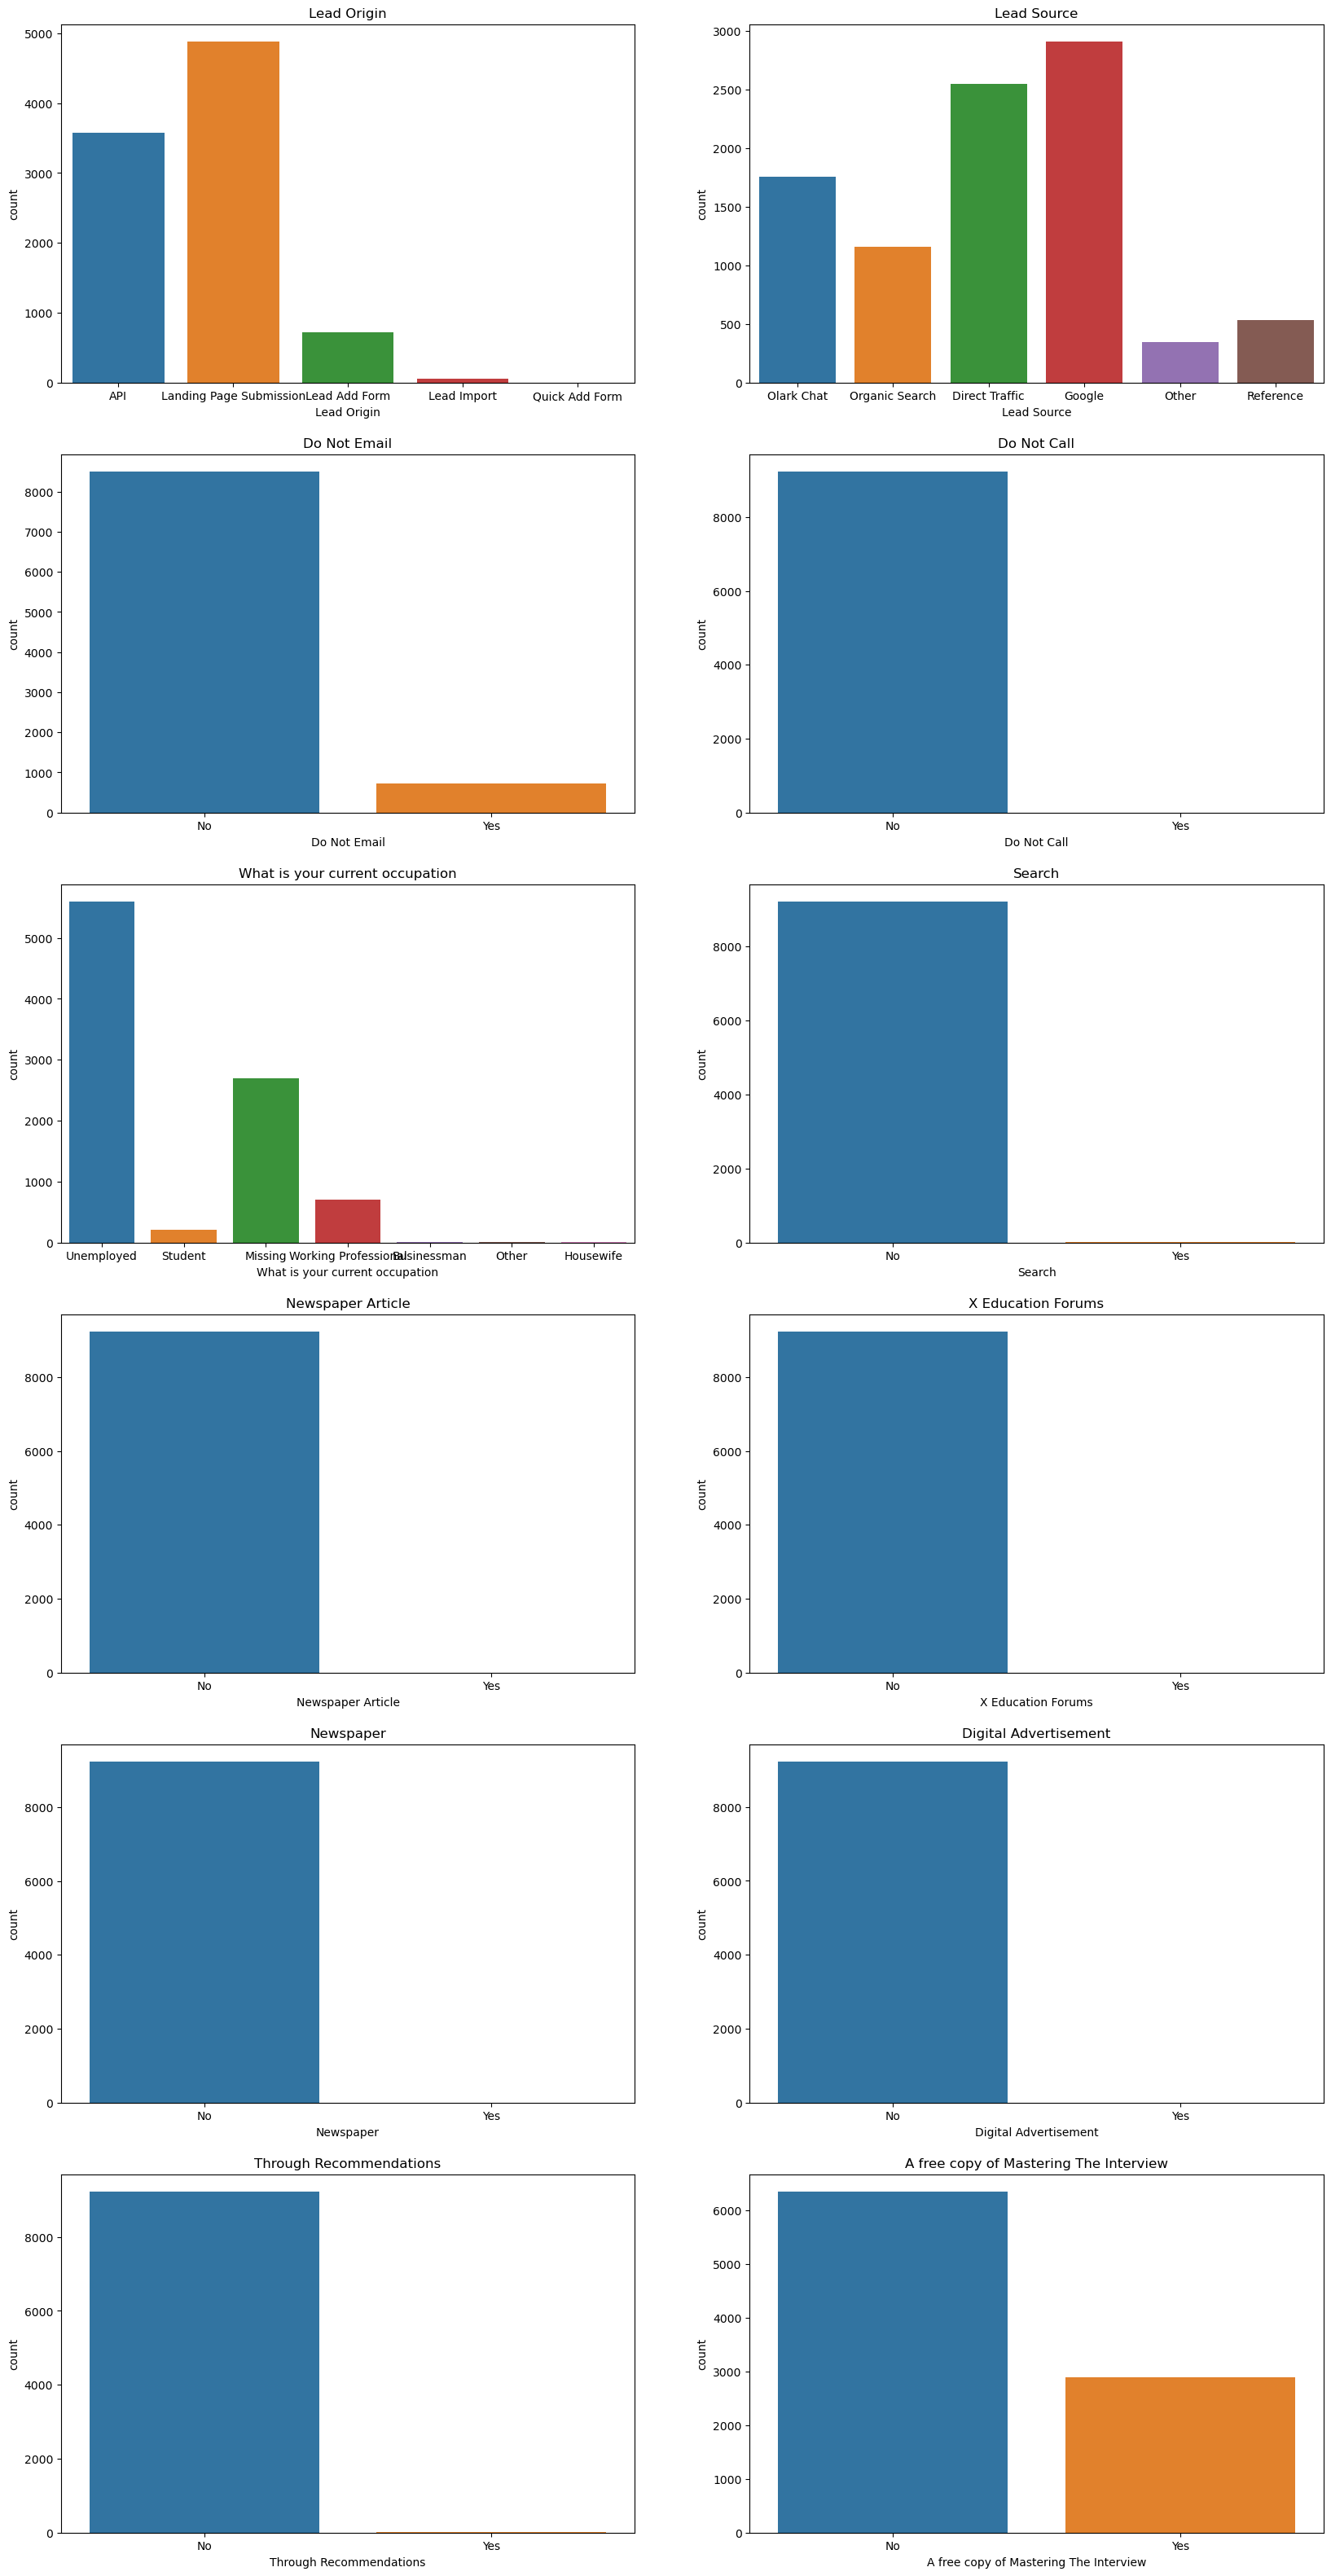

In [69]:
plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(x='Lead Origin', data=lead_data)
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(x='Lead Source', data=lead_data)
plt.title('Lead Source')

plt.subplot(6,2,3)
sns.countplot(x='Do Not Email', data=lead_data)
plt.title('Do Not Email')

plt.subplot(6,2,4)
sns.countplot(x='Do Not Call', data=lead_data)
plt.title('Do Not Call')

plt.subplot(6,2,5)
sns.countplot(x='What is your current occupation', data=lead_data)
plt.title('What is your current occupation')

plt.subplot(6,2,6)
sns.countplot(x='Search', data=lead_data)
plt.title('Search')

plt.subplot(6,2,7)
sns.countplot(x='Newspaper Article', data=lead_data)
plt.title('Newspaper Article')

plt.subplot(6,2,8)
sns.countplot(x='X Education Forums', data=lead_data)
plt.title('X Education Forums')

plt.subplot(6,2,9)
sns.countplot(x='Newspaper', data=lead_data)
plt.title('Newspaper')

plt.subplot(6,2,10)
sns.countplot(x='Digital Advertisement', data=lead_data)
plt.title('Digital Advertisement')

plt.subplot(6,2,11)
sns.countplot(x='Through Recommendations', data=lead_data)
plt.title('Through Recommendations')

plt.subplot(6,2,12)
sns.countplot(x='A free copy of Mastering The Interview', data=lead_data)
plt.title('A free copy of Mastering The Interview')

plt.show()

Text(0.5, 1.0, 'Specialization')

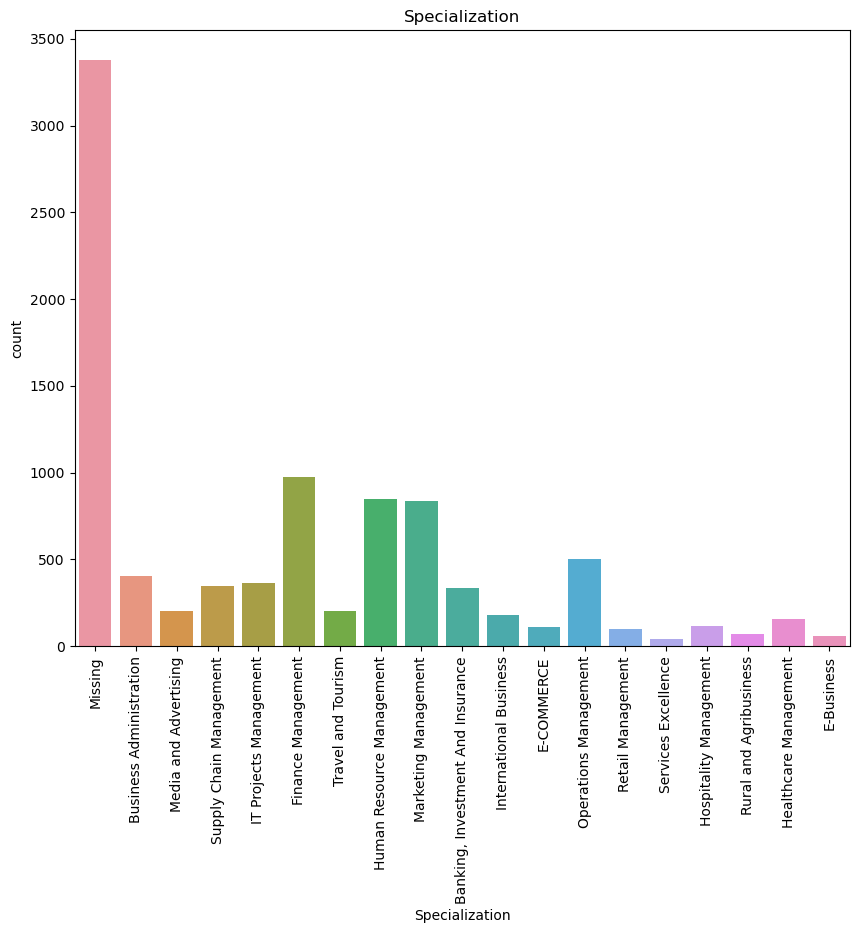

In [70]:
plt.figure(figsize=(10, 8))
sns.countplot(x='Specialization', data=lead_data)
plt.xticks(rotation=90)
plt.title('Specialization')

Text(0.5, 1.0, 'Last Notable Activity')

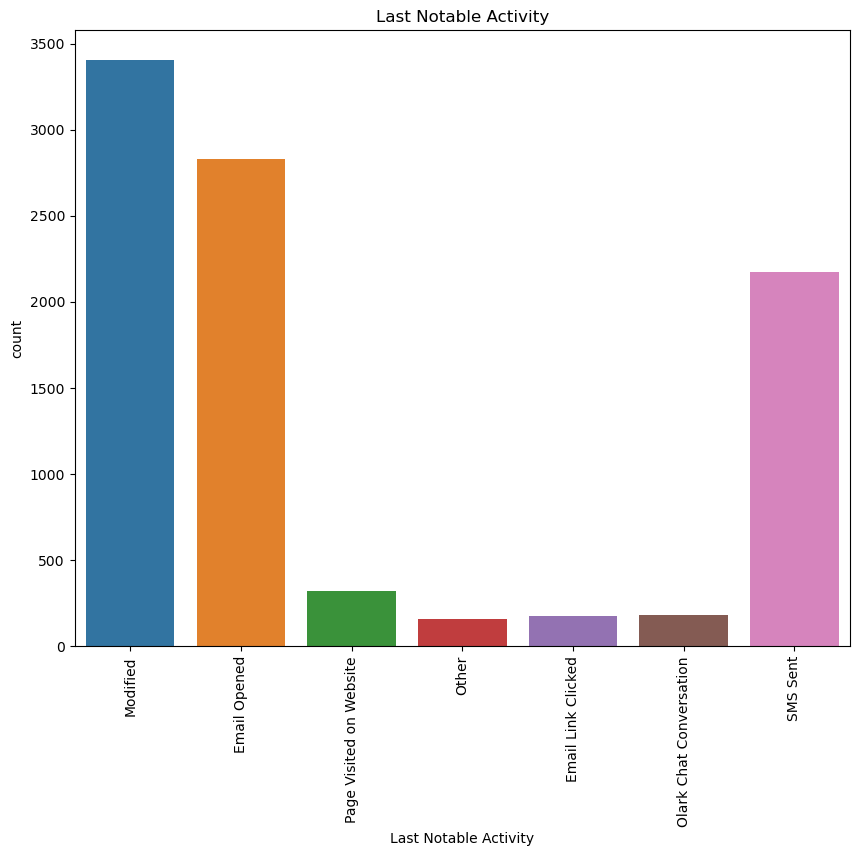

In [71]:
plt.figure(figsize=(10, 8))
sns.countplot(x='Last Notable Activity', data=lead_data)
plt.xticks(rotation=90)
plt.title('Last Notable Activity')

#### 1.2. Numerical Variables

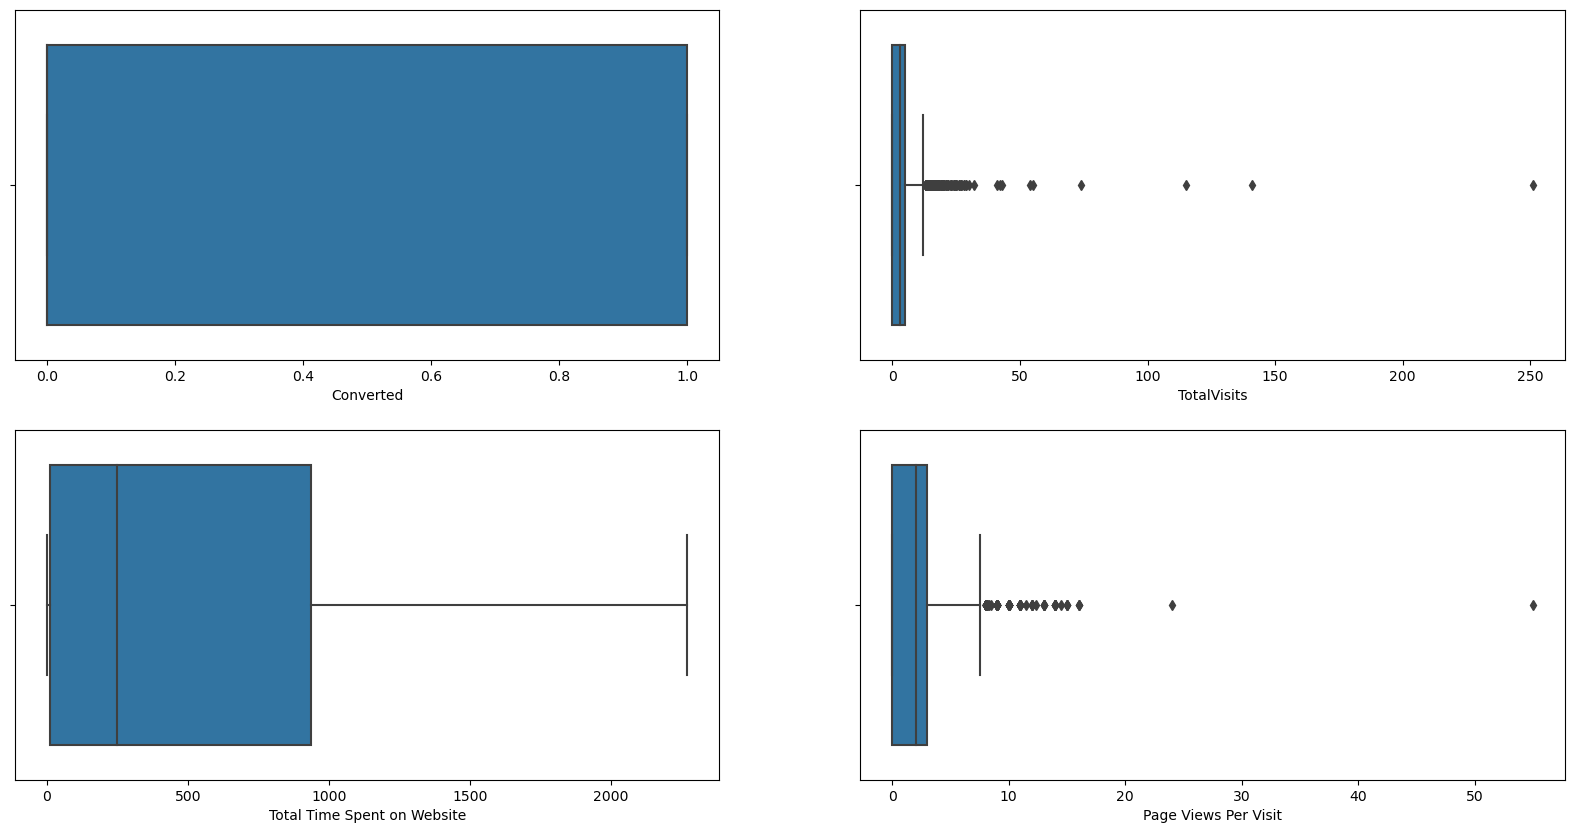

In [72]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.boxplot(data=lead_data, x='Converted')

plt.subplot(2,2,2)
sns.boxplot(data=lead_data, x='TotalVisits')

plt.subplot(2,2,3)
sns.boxplot(data=lead_data, x='Total Time Spent on Website')

plt.subplot(2,2,4)
sns.boxplot(data=lead_data, x='Page Views Per Visit')

plt.show()


In [73]:
# We can clearly understand there is outlier in total visits and page views per visit.

In [74]:
numeric = lead_data[['TotalVisits','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

TotalVisits  Page Views Per Visit
count  9240.000000           9240.000000
mean      3.394156              2.327787
std       4.836682              2.164258
min       0.000000              0.000000
25%       0.000000              0.000000
50%       3.000000              2.000000
75%       5.000000              3.000000
90%       7.000000              5.000000
99%      17.000000              9.000000
max     251.000000             55.000000

In [75]:
# Filter rows where 'TotalVisits' is greater than the 99th percentile

total_visits_99th_percentile = lead_data['TotalVisits'].quantile(0.99)

outliers_total_visits = lead_data[lead_data['TotalVisits'] > total_visits_99th_percentile]

In [76]:
# Count the number of rows with 'TotalVisits' beyond the 99th percentile
num_outliers_total_visits = outliers_total_visits.shape[0]

In [77]:
num_outliers_total_visits

83

In [78]:
# we can see only 83 cloumns is there which is more than 99 % percentile , so we can drop them .

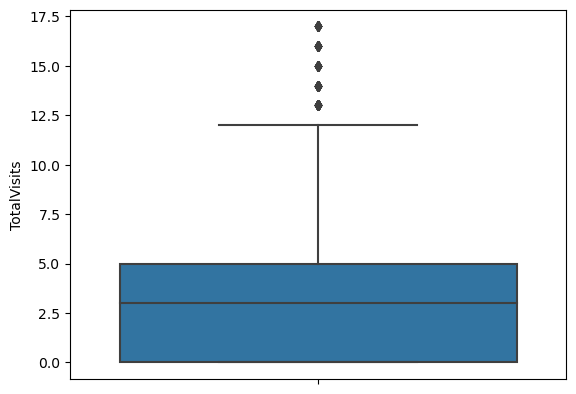

In [79]:
Q3 = lead_data.TotalVisits.quantile(0.99)
lead_data = lead_data[(lead_data.TotalVisits <= Q3)]
Q1 = lead_data.TotalVisits.quantile(0.01)
lead_data = lead_data[(lead_data.TotalVisits >= Q1)]
sns.boxplot(y=lead_data['TotalVisits'])
plt.show()


In [80]:
numeric = lead_data[['TotalVisits','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

TotalVisits  Page Views Per Visit
count  9157.000000           9157.000000
mean      3.159004              2.302302
std       2.993084              2.066450
min       0.000000              0.000000
25%       0.000000              0.000000
50%       3.000000              2.000000
75%       5.000000              3.000000
90%       7.000000              5.000000
99%      13.000000              9.000000
max      17.000000             16.000000

### 2. Bivariate Analysis

In [81]:
# All categorical variables vs Converted

#### 2.1 Categorical vs numerical (column : Converted )

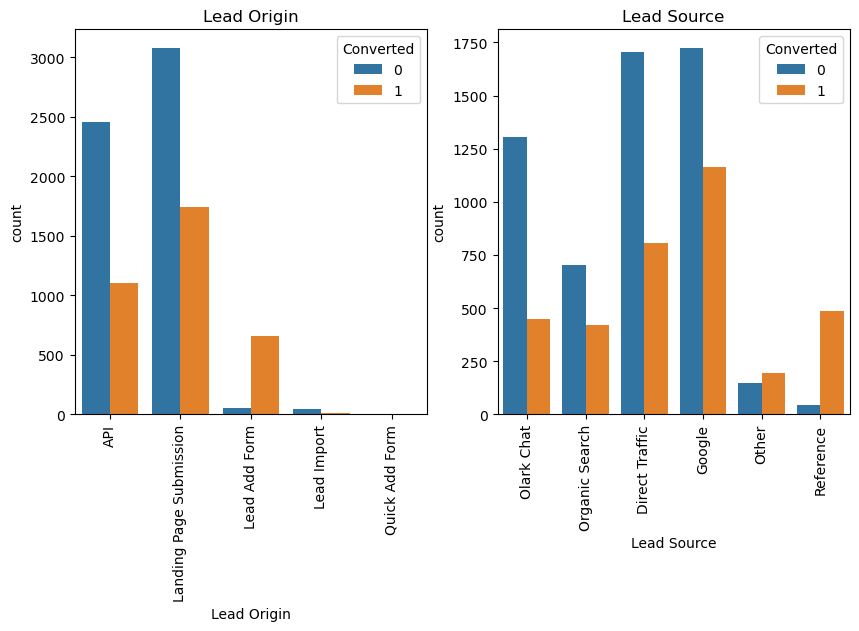

In [82]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= lead_data)
plt.title('Lead Origin')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= lead_data)
plt.title('Lead Source')
plt.xticks(rotation=90)

plt.show()

In [83]:
# Maximum lead conversion happened from Landing Page Submission.
# Max lead conversion in the lead source is from 'Google'

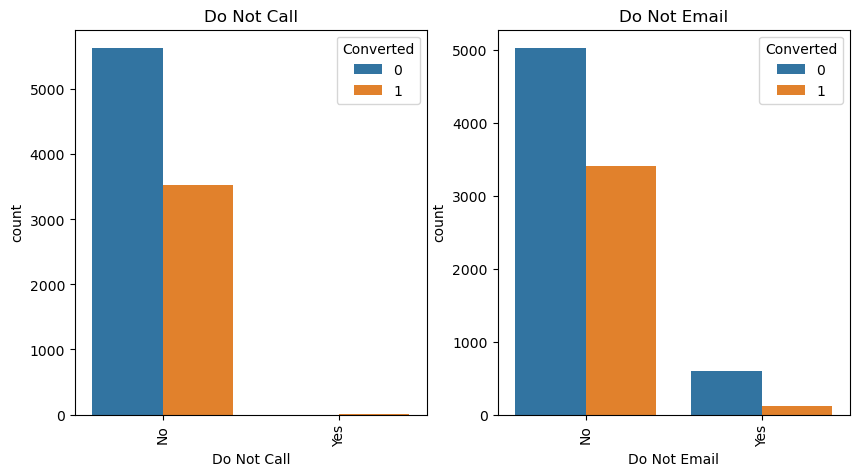

In [84]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Call', hue='Converted', data= lead_data)
plt.title('Do Not Call')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(x='Do Not Email', hue='Converted', data= lead_data)
plt.title('Do Not Email')
plt.xticks(rotation=90)

plt.show()

In [85]:
## Major lead conversion has happened from the emails that have been sent.
## Major lead conversion has happened from the calls they are doing.

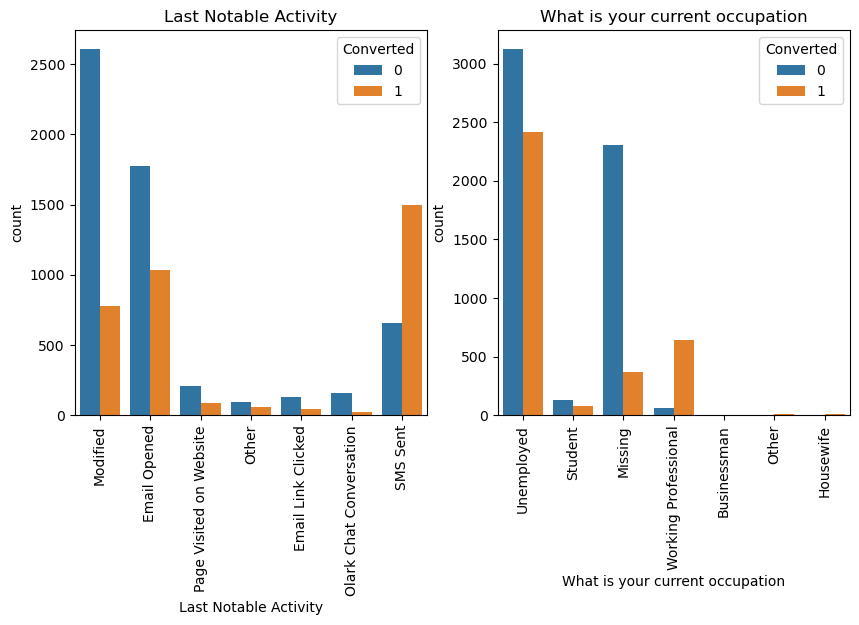

In [86]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Notable Activity', hue='Converted', data= lead_data)
plt.title('Last Notable Activity')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= lead_data)
plt.title('What is your current occupation')
plt.xticks(rotation=90)

plt.show()

In [87]:
## Maximum conversion to those customers who has opened their mails and whom sms being sent , and those customer who has modified.
## Major lead conversion is from the Unemployed Group

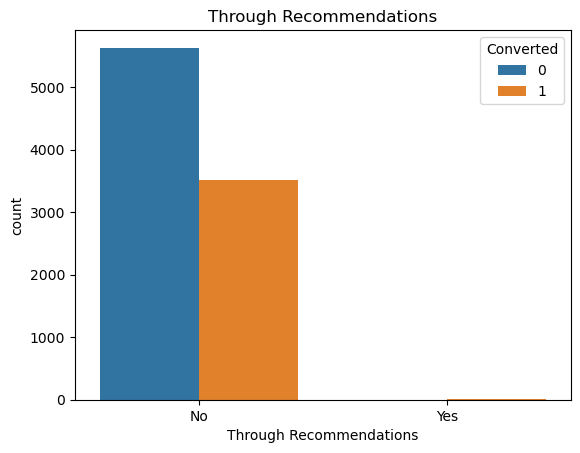

In [88]:
sns.countplot(x='Through Recommendations', hue='Converted', data= lead_data)
plt.title('Through Recommendations')

plt.show()

In [89]:
## 

#### 2.1 Numerical vs numerical (column : Converted )

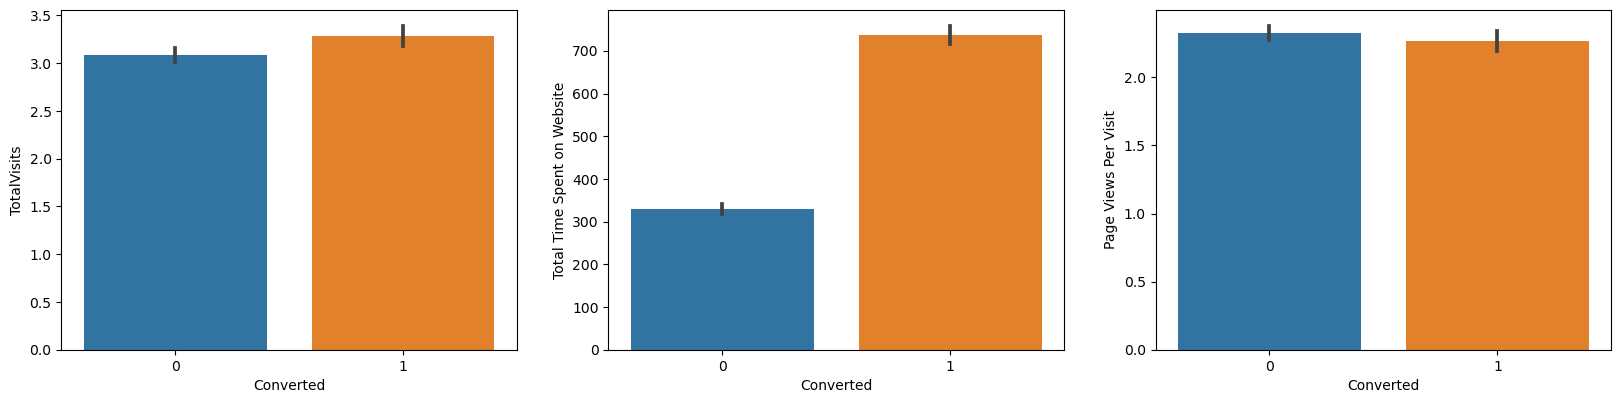

In [90]:
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.barplot(x = 'Converted', y = 'TotalVisits', data = lead_data)

plt.subplot(3,3,2)
sns.barplot(x = 'Converted', y = 'Total Time Spent on Website',data = lead_data)

plt.subplot(3,3,3)
sns.barplot(x = 'Converted', y = 'Page Views Per Visit',data = lead_data)

plt.show()

In [91]:
## Max lead conversion of those customer who has spent max time on the website.
## No of visits and age views per visit has similar conversion rate 50-50% .

#### 3. Data Imbalance

In [92]:
# Check for data imbalance between converted - 1 and non converted - 0

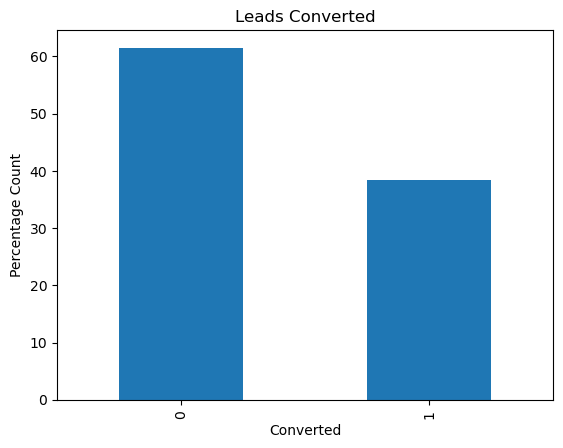

In [93]:
## ploting the results on bar plot

ax=(100*lead_data["Converted"].value_counts(normalize=True)).plot.bar()

# Adding and formatting title
plt.title("Leads Converted")

# Labeling Axes
plt.xlabel('Converted')
plt.ylabel("Percentage Count")
    
plt.show()

In [94]:
lead_Converted_percent = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
lead_Converted_percent

38.49514032980233

In [95]:
# Conversion rate is of 38.5%, meaning only 38.5% of the people have converted to leads.
# While 61.5% of the people didnt convert to leads.

In [96]:
for column in lead_data:
    print(lead_data[column].value_counts())
    print('___________________________________________________')

Lead Origin
Landing Page Submission    4820
API                        3564
Lead Add Form               717
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
___________________________________________________
Lead Source
Google            2891
Direct Traffic    2512
Olark Chat        1753
Organic Search    1125
Reference          533
Other              343
Name: count, dtype: int64
___________________________________________________
Do Not Email
No     8440
Yes     717
Name: count, dtype: int64
___________________________________________________
Do Not Call
No     9155
Yes       2
Name: count, dtype: int64
___________________________________________________
Converted
0    5632
1    3525
Name: count, dtype: int64
___________________________________________________
TotalVisits
0.0     2326
2.0     1680
3.0     1306
4.0     1120
5.0      783
6.0      466
1.0      395
7.0      309
8.0      224
9.0      164
10.0     114
11.0      86
13.0      48
12.0

In [97]:
# As X Education Forums
# 0    9157
# 1     0
# So drop this column

lead_data.drop(['X Education Forums'], axis = 1, inplace = True) 

## Step 4: Data Preparation

In [98]:
# Converting binary variables(yes/No) to 1/0

In [99]:
lead_data.head()

Lead Origin     Lead Source Do Not Email Do Not Call  \
0                      API      Olark Chat           No          No   
1                      API  Organic Search           No          No   
2  Landing Page Submission  Direct Traffic           No          No   
3  Landing Page Submission  Direct Traffic           No          No   
4  Landing Page Submission          Google           No          No   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                  Missing   
1             Email Opened                  Missing   
2             Email Opened  Business Administration   
3                    Other    Media and Advertising   
4        Converted to Lead                  Missing   

  What is your current occupation Search Newspaper Article Newspaper  \
0                      Unemployed     No                No        No   
1                      Unemployed     No                No        No   
2                         Student     No                No        No   
3                      Unemployed     No                No        No   
4                      Unemployed     No                No        No   

  Digital Advertisement Through Recommendations  \
0                    No                      No   
1                    No                      No   
2                    No                      No   
3                    No                      No   
4                    No                      No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

In [100]:
lead_data.shape

(9157, 18)

In [101]:
varlist = ["Do Not Email" , "Do Not Call", "Search", "Newspaper Article" ,  "Newspaper" ,
           "Digital Advertisement" ,"Through Recommendations" , "A free copy of Mastering The Interview"]

In [102]:
def binary_map(x):
    return x.map({'Yes':1 , "No" : 0})

In [103]:
lead_data[varlist] = lead_data[varlist].apply(binary_map)

In [104]:
lead_data.head()

Lead Origin     Lead Source  Do Not Email  Do Not Call  \
0                      API      Olark Chat             0            0   
1                      API  Organic Search             0            0   
2  Landing Page Submission  Direct Traffic             0            0   
3  Landing Page Submission  Direct Traffic             0            0   
4  Landing Page Submission          Google             0            0   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                  Missing   
1             Email Opened                  Missing   
2             Email Opened  Business Administration   
3                    Other    Media and Advertising   
4        Converted to Lead                  Missing   

  What is your current occupation  Search  Newspaper Article  Newspaper  \
0                      Unemployed       0                  0          0   
1                      Unemployed       0                  0          0   
2                         Student       0                  0          0   
3                      Unemployed       0                  0          0   
4                      Unemployed       0                  0          0   

   Digital Advertisement  Through Recommendations  \
0                      0                        0   
1                      0                        0   
2                      0                        0   
3                      0                        0   
4                      0                        0   

   A free copy of Mastering The Interview Last Notable Activity  
0                                       0              Modified  
1                                       0          Email Opened  
2                                       1          Email Opened  
3                                       0              Modified  
4                                       0              Modified

In [105]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9157 entries, 0 to 9239
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9157 non-null   object 
 1   Lead Source                             9157 non-null   object 
 2   Do Not Email                            9157 non-null   int64  
 3   Do Not Call                             9157 non-null   int64  
 4   Converted                               9157 non-null   int64  
 5   TotalVisits                             9157 non-null   float64
 6   Total Time Spent on Website             9157 non-null   int64  
 7   Page Views Per Visit                    9157 non-null   float64
 8   Last Activity                           9157 non-null   object 
 9   Specialization                          9157 non-null   object 
 10  What is your current occupation         9157 non-null   object 
 

#### Dummy Variables 

In [106]:
# For categorical variables with multiple levels , create dummy features 
# Column :
#    - Lead Origin
#    - Lead Source
#    - Last Activity
#    - Specialization
#    - What is your current occupation
#    - Last Notable Activity 

In [107]:
#creating dummy variables data set
dummy = pd.get_dummies(lead_data[['Lead Origin', 'Lead Source', 'Last Activity' , 'Specialization' ,
                                'What is your current occupation', 'Last Notable Activity']], drop_first = True).astype(int)

# Adding these dummies to our original dataset
lead_data = pd.concat([lead_data, dummy], axis = 1)


lead_data.head()

Lead Origin     Lead Source  Do Not Email  Do Not Call  \
0                      API      Olark Chat             0            0   
1                      API  Organic Search             0            0   
2  Landing Page Submission  Direct Traffic             0            0   
3  Landing Page Submission  Direct Traffic             0            0   
4  Landing Page Submission          Google             0            0   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                  Missing   
1             Email Opened                  Missing   
2             Email Opened  Business Administration   
3                    Other    Media and Advertising   
4        Converted to Lead                  Missing   

  What is your current occupation  Search  Newspaper Article  Newspaper  \
0                      Unemployed       0                  0          0   
1                      Unemployed       0                  0          0   
2                         Student       0                  0          0   
3                      Unemployed       0                  0          0   
4                      Unemployed       0                  0          0   

   Digital Advertisement  Through Recommendations  \
0                      0                        0   
1                      0                        0   
2                      0                        0   
3                      0                        0   
4                      0                        0   

   A free copy of Mastering The Interview Last Notable Activity  \
0                                       0              Modified   
1                                       0          Email Opened   
2                                       1          Email Opened   
3                                       0              Modified   
4                                       0              Modified   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Google  \
0                        0                           0                   0   
1                        0                           0                   0   
2                        0                           0                   0   
3                        0                           0                   0   
4                        0                           0                   1   

   Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Other  \
0                       1                           0                  0   
1                       0                           1                  0   
2                       0                           0                  0   
3                       0                           0                  0   
4                       0                           0                  0   

   Lead Source_Reference  Last Activity_Email Bounced  \
0                      0                            0   
1                      0                            0   
2                      0                            0   
3                     

In [108]:
lead_data.shape

(9157, 65)

In [109]:
# Now we can drop the below variables , as we have created the dummy variables

lead_data = lead_data.drop(['Lead Origin', 'Lead Source', 'Last Activity' , 'Specialization' ,
                                'What is your current occupation', 'Last Notable Activity'], axis=1)

In [110]:
lead_data.shape

(9157, 59)

## Step 5: Test-Train Split

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
X = lead_data.drop(['Converted'], axis = 1)
X.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
0             0            0          0.0                            0   
1             0            0          5.0                          674   
2             0            0          2.0                         1532   
3             0            0          1.0                          305   
4             0            0          2.0                         1428   

   Page Views Per Visit  Search  Newspaper Article  Newspaper  \
0                   0.0       0                  0          0   
1                   2.5       0                  0          0   
2                   2.0       0                  0          0   
3                   1.0       0                  0          0   
4                   1.0       0                  0          0   

   Digital Advertisement  Through Recommendations  \
0                      0                        0   
1                      0                        0   
2                      0                        0   
3                      0                        0   
4                      0                        0   

   A free copy of Mastering The Interview  \
0                                       0   
1                                       0   
2                                       1   
3                                       0   
4                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Google  \
0                        0                           0                   0   
1                        0                           0                   0   
2                        0                           0                   0   
3                        0                           0                   0   
4                        0                           0                   1   

   Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Other  \
0                       1                           0                  0   
1                       0                           1                  0   
2                       0                           0                  0   
3                       0                           0                  0   
4                       0                           0                  0   

   Lead Source_Reference  Last Activity_Email Bounced  \
0                      0                            0   
1                      0                            0   
2                      0                            0   
3                      0                            0   
4                      0                            0   

   Last Activity_Email Link Clicked  Last Activity_Email Opened  \
0                                 0                           0   
1                                 0                           1   
2                                 0                           1   
3                                 0                           0   
4                                 0                           0   

   Last Activity_Form Submitted on Website  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   Last Activity_Olark Chat Conversation  Last Activity_Other  \
0                                      0                    0   
1                                      0                    0   
2                 

In [113]:
# target variable : Converted
y = lead_data['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [114]:
# Split the data into 70% train and 30 % test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [115]:
y_train.head()

4418    0
3517    0
4639    0
1904    0
3044    1
Name: Converted, dtype: int64

In [116]:
y_train.values

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

## Step 6 : Feature Scalling

In [117]:
# Import MinMax scaler

In [118]:
from sklearn.preprocessing import MinMaxScaler 

In [119]:
scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
4418             0            0     0.235294                     0.666223   
3517             1            0     0.176471                     0.149578   
4639             0            0     0.117647                     0.040391   
1904             0            0     0.235294                     0.022636   
3044             0            0     0.235294                     0.402130   

      Page Views Per Visit  Search  Newspaper Article  Newspaper  \
4418                0.2500       0                  0          0   
3517                0.1875       0                  0          0   
4639                0.1250       0                  0          0   
1904                0.2500       0                  0          0   
3044                0.2500       0                  0          0   

      Digital Advertisement  Through Recommendations  \
4418                      0                        0   
3517                      0                        0   
4639                      0                        0   
1904                      0                        0   
3044                      0                        0   

      A free copy of Mastering The Interview  \
4418                                       0   
3517                                       0   
4639                                       1   
1904                                       1   
3044                                       1   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
4418                                    1                          0   
3517                                    1                          0   
4639                                    1                          0   
1904                                    1                          0   
3044                                    1                          0   

      Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Google  \
4418                        0                           0                   1   
3517                        0                           0                   1   
4639                        0                           0                   0   
1904                        0                           0                   0   
3044                        0                           0                   0   

      Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Other  \
4418                       0                           0                  0   
3517                       0                           0                  0   
4639                       0                           0                  0   
1904                       0                           0                  0   
3044                       0                           0                  0   

      Lead Source_Reference  Last Activity_Email Bounced  \
4418                      0                            0   
3517                      0                            1   
4639                      0                            0   
1904                      0                            0   
3044                      0                            0   

      Last Activity_Email Link Clicked  Last Activity_Email Opened  \
4418                                 0                           0   
3517                                 0                           0   
4639                                 0                           1   
1904                                 0                           1   
3044                                 0                           0   

      Last Activity_Form Submitted on Website  \
4418                                        0   
3517                                        0   
4639                                        0   
1904                                        0   
3044                                        0   

      Last Activity_Olark Chat Conve

## Step 6 : Looking at correlations

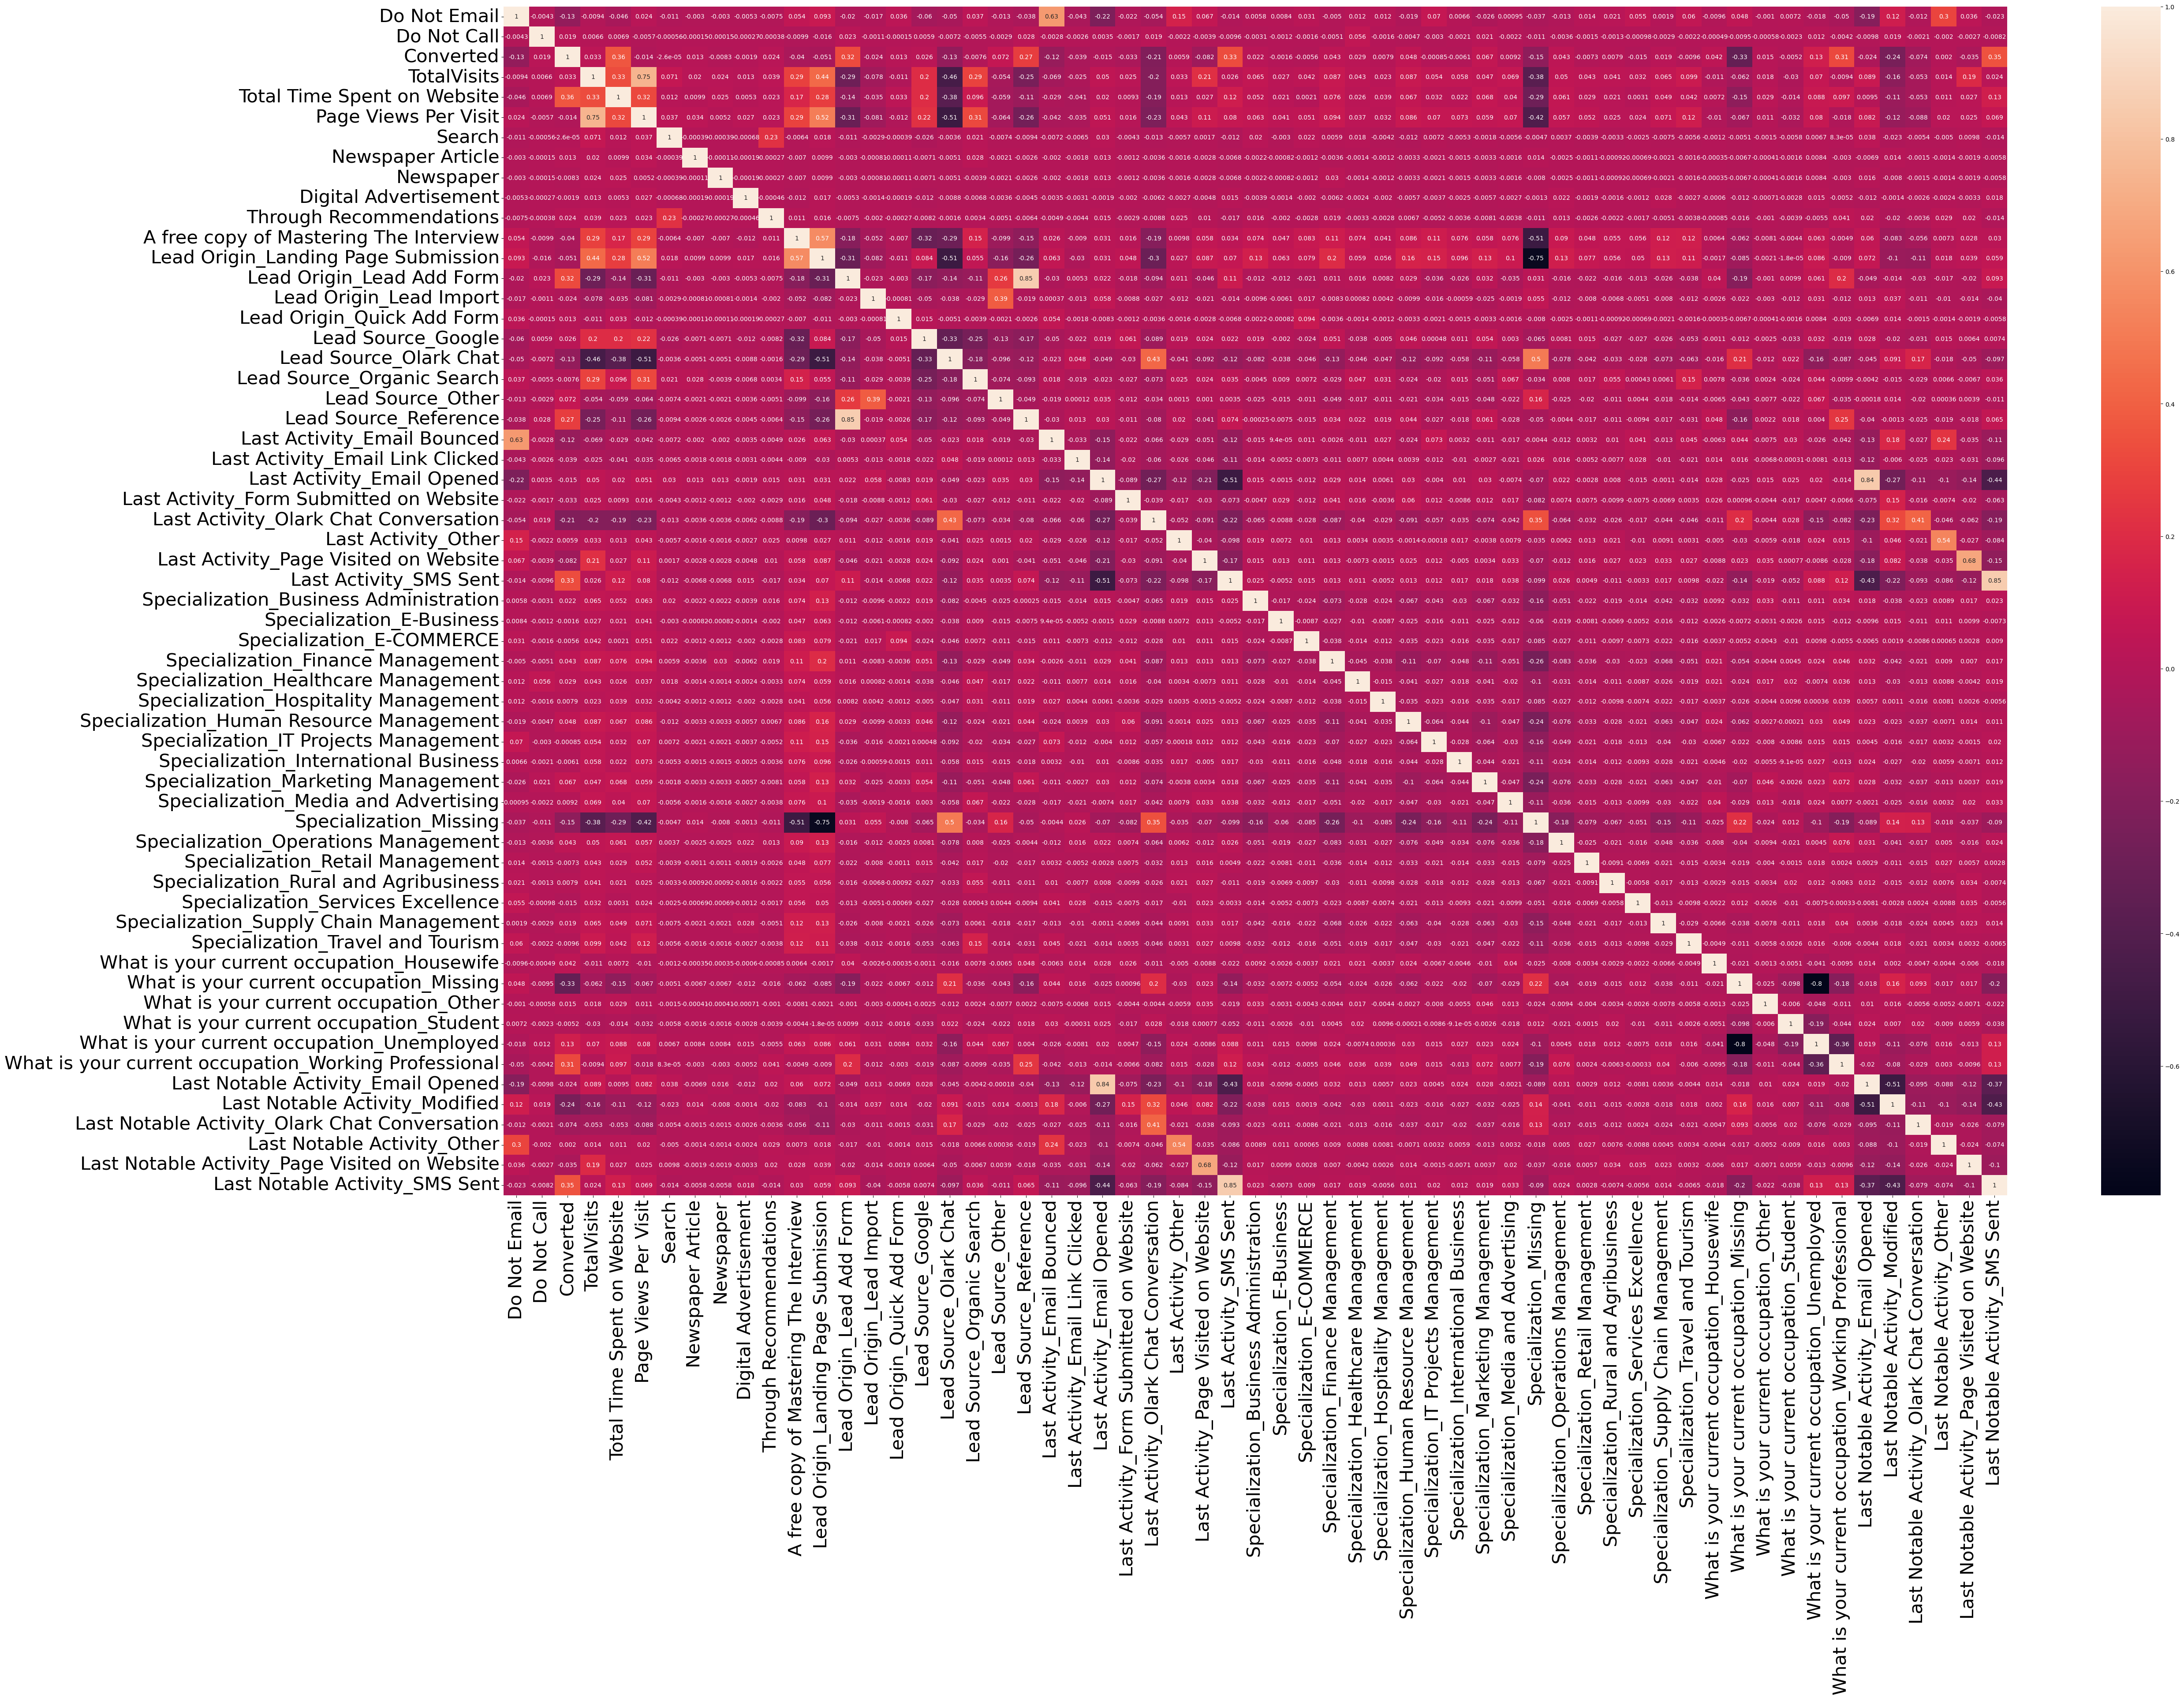

In [120]:
plt.figure(figsize=(55,35))

sns.heatmap(lead_data.corr(),annot=True)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.show()

In [121]:
# Now we need to remove the higly correlated dummy cariables 
# We can see below volumns which is highly co-related 
#    - Total visits vs Page View per visit : 0.75
#    - Do not email vs Last Activity _email Bounced : 0.64
#    - Lead Origin_Lead Add Form vs Lead Source_Reference : 0.85
#    - Specialization_missing vs Lead Origin_Landing Page Submission-0.75
#    - Lead Origin Lead Add Form vs Lead Source_Reference - 0.85
#    - Last Notable Activity _Email Opened vs Last Activity_Email Opened : 0.84
#    - Last Notable Actitivity_Page Visited on website vs Last Activity_Page Visited on website: 0.68
#   - Last Notable Activity_SMS sent vs Last Activity_SMS sent : 0.85
#    - What is your current occupation_Missing vs What is your current occupation_Unemplyoed :0.8

## Step 7 : Model Building 

In [122]:
import statsmodels.api as sm

In [123]:
# Logistic Regression first Model 
logm1 = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial())

# Fit the model
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6351
Model Family:                Binomial   Df Model:                           57
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 16 Apr 2024   Deviance:                   1.1605e+05
Time:                        13:56:09   Pearson chi2:                 5.67e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                -1.047e+15   2.68e+07   -3.9e+07      0.000   -1.05e+15   -1.05e+15
Do Not Email                                          -6.77e+14   4.28e+06  -1.58e+08      0.000   -6.77e+14   -6.77e+14
Do Not Call                                           5.804e+15   4.77e+07   1.22e+08      0.000     5.8e+15     5.8e+15
TotalVisits                                           8.174e+14   7.73e+06   1.06e+08      0.000    8.17e+14    8.17e+14
Total Time Spent on Website                           2.367e+15   3.95e+06   5.99e+08      0.000    2.37e+15    2.37e+15
Page Views Per Visit                                 -1.128e+15   1.11e+07  -1.02e+08      0.000   -1.13e+15   -1.13e+15
Search                                               -1.185e+15   2.12e+07   -5.6e+07      0.000   -1.19e+15   -1.19e+15
Newspaper Article                                       12.9161   2.36e-07   5.47e+07      0.000      12.916      12.916
Newspaper                                            -5.665e+15   6.73e+07  -8.42e+07      0.000   -5.67e+15   -5.67e+15
Digital Advertisement                                -1.609e+15   4.77e+07  -3.37e+07      0.000   -1.61e+15   -1.61e+15
Through Recommendations                               1.083e+15   3.13e+07   3.46e+07      0.000    1.08e+15    1.08e+15
A free copy of Mastering The Interview               -4.183e+13   2.67e+06  -1.57e+07      0.000   -4.18e+13   -4.18e+13
Lead Origin_Landing Page Submission                  -3.432e+14    3.4e+06  -1.01e+08      0.000   -3.43e+14   -3.43e+14
Lead Origin_Lead Add Form                             1.279e+15   8.15e+06   1.57e+08      0.000    1.28e+15    1.28e+15
Lead Origin_Lead Import                              -4.464e+14   1.28e+07  -3.49e+07      0.000   -4.46e+14   -4.46e+14
Lead Origin_Quick Add Form                            7.992e+15   6.79e+07   1.18e+08      0.000    7.99e+15    7.99e+15
Lead Source_Google                                    3.229e+14   2.84e+06   1.14e+08      0.000    3.23e+14    3.23e+14
Lead Source_Olark Chat                                1.242e+15   3.94e+06   3.15e+08      0.000    1.24e+15    1.24e+15
Lead Source_Organic Search                            2.342e+14   3.23e+06   7.26e+07      0.000    2.34e+14    2.34e+14
Lead Source_Other                                     5.891e+14   6.87e+06   8.57e+07      0.000    5.89e+14    5.89e+14
Lead Source_Reference                                 3.857e+14   9.11e+06   4.23e+07      0.000    3.86e+14    3.86e+14
Last Activity_Email Bounced                           1.735e+14   7.24e+06   2.39e+07      0.000    1.73e+14    1.73e+14
Last Activity_Email Link Clicked                      4.32

## Step 8 : Feature Selection Using RFE

In [124]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()  

In [125]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15) 
rfe = rfe.fit(X_train,y_train) 

In [126]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 12),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Search', False, 33),
 ('Newspaper Article', False, 44),
 ('Newspaper', False, 2),
 ('Digital Advertisement', False, 8),
 ('Through Recommendations', False, 20),
 ('A free copy of Mastering The Interview', False, 34),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 15),
 ('Lead Origin_Quick Add Form', False, 25),
 ('Lead Source_Google', False, 18),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 19),
 ('Lead Source_Other', False, 14),
 ('Lead Source_Reference', True, 1),
 ('Last Activity_Email Bounced', False, 28),
 ('Last Activity_Email Link Clicked', False, 10),
 ('Last Activity_Email Opened', False, 4),
 ('Last Activity_Form Submitted on Website', False, 27),
 ('Last Activity_Olark Chat Conversation', True, 1),
 (

In [127]:
rfe_col = X_train.columns[rfe.support_]

# listing features removed by RFE feature selection
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'Search', 'Newspaper Article', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Other',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Other', 'Last Activity_Page Visited on Website',
       'Last Activity_SMS Sent', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketin

In [128]:
# Creating new train dataframe with RFE selected features

X_train_rfe = X_train[rfe_col]
X_train_rfe.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
4418             0     0.235294                     0.666223   
3517             1     0.176471                     0.149578   
4639             0     0.117647                     0.040391   
1904             0     0.235294                     0.022636   
3044             0     0.235294                     0.402130   

      Page Views Per Visit  Lead Origin_Landing Page Submission  \
4418                0.2500                                    1   
3517                0.1875                                    1   
4639                0.1250                                    1   
1904                0.2500                                    1   
3044                0.2500                                    1   

      Lead Origin_Lead Add Form  Lead Source_Olark Chat  \
4418                          0                       0   
3517                          0                       0   
4639                          0                       0   
1904                          0                       0   
3044                          0                       0   

      Lead Source_Reference  Last Activity_Olark Chat Conversation  \
4418                      0                                      0   
3517                      0                                      0   
4639                      0                                      0   
1904                      0                                      0   
3044                      0                                      0   

      Specialization_Missing  What is your current occupation_Housewife  \
4418                       0                                          0   
3517                       0                                          0   
4639                       0                                          0   
1904                       0                                          0   
3044                       0                                          0   

      What is your current occupation_Missing  \
4418                                        0   
3517                                        0   
4639                                        1   
1904                                        0   
3044                                        0   

      What is your current occupation_Working Professional  \
4418                                                  0      
3517                                                  0      
4639                                                  0      
1904                                                  0      
3044                                                  0      

      Last Notable Activity_Other  Last Notable Activity_SMS Sent  
4418                            0                               1  
3517                            1                               0  
4639                            0                               0  
1904                            0                               0  
3044                            0                               1

#### Model 1

In [129]:
# creating 1st model

# Adding a constant
X_train_1=sm.add_constant(X_train_rfe)

# creating a model and fitting it.

logr1=sm.GLM(y_train,X_train_1,family=sm.families.Binomial()).fit()
logr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6393
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2544.7
Date:                Tue, 16 Apr 2024   Deviance:                       5089.4
Time:                        13:56:17   Pearson chi2:                 6.63e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4169
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5280      0.154     -9.909      0.000      -1.830      -1.226
Do Not Email                                            -1.7709      0.190     -9.340      0.000      -2.143      -1.399
TotalVisits                                              1.8848      0.287      6.562      0.000       1.322       2.448
Total Time Spent on Website                              4.5586      0.168     27.141      0.000       4.229       4.888
Page Views Per Visit                                    -1.6412      0.426     -3.850      0.000      -2.477      -0.806
Lead Origin_Landing Page Submission                     -0.8418      0.130     -6.478      0.000      -1.096      -0.587
Lead Origin_Lead Add Form                                4.8141      0.445     10.815      0.000       3.942       5.687
Lead Source_Olark Chat                                   1.3083      0.138      9.475      0.000       1.038       1.579
Lead Source_Reference                                   -1.6091      0.479     -3.358      0.001      -2.548      -0.670
Last Activity_Olark Chat Conversation                   -1.3797      0.173     -7.956      0.000      -1.720      -1.040
Specialization_Missing                                  -0.8278      0.127     -6.506      0.000      -1.077      -0.578
What is your current occupation_Housewife               22.8546   1.63e+04      0.001      0.999   -3.18e+04    3.19e+04
What is your current occupation_Missing                 -1.0327      0.091    -11.389      0.000      -1.210      -0.855
What is your current occupation_Working Professional     2.2670      0.185     12.222      0.000       1.903       2.631
Last Notable Activity_Other                              1.6208      0.288      5.634      0.000       1.057       2.185
Last Notable Activity_SMS Sent                           1.6144      0.082     19.628      0.000       1.453       1.776
========================================================================================================================
"""

In [130]:
# importing VIFs library
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating vif dataframe
vif=pd.DataFrame()

# adding same features as the x_train dataset have
vif['Features']=X_train_rfe[rfe_col].columns  

# Caculating VIFs
vif['VIF']=[variance_inflation_factor(X_train_rfe[rfe_col].values,i) for i in range(X_train_rfe[rfe_col].shape[1])]

# Rounding the vif values
vif['VIF']=round(vif['VIF'],2)

# Sorting the vif values
vif=vif.sort_values(by='VIF',ascending=False)
vif

Features   VIF
3                                Page Views Per Visit  5.76
1                                         TotalVisits  4.85
5                           Lead Origin_Lead Add Form  4.20
7                               Lead Source_Reference  4.01
4                 Lead Origin_Landing Page Submission  3.48
9                              Specialization_Missing  2.61
2                         Total Time Spent on Website  2.12
6                              Lead Source_Olark Chat  2.06
11            What is your current occupation_Missing  1.62
8               Last Activity_Olark Chat Conversation  1.45
14                     Last Notable Activity_SMS Sent  1.43
12  What is your current occupation_Working Profes...  1.22
0                                        Do Not Email  1.21
13                        Last Notable Activity_Other  1.12
10          What is your current occupation_Housewife  1.01

In [131]:
# What is your current occupation_Housewife : Highest P value : 0.99 

# Now, From the above summary presented there are some features having high p -values,we will drop features having 
#insignificant values one by one and create new models until all the features attain significant
# p-value<0.05 and vif-values < 4.

#### Model 2

In [132]:
# Dropping the most insignificant values 'What is your current occupation_Housewife' and constant

X_train_rfe2 = X_train_1.drop(['const','What is your current occupation_Housewife'],axis= 1)

# Creating a new model 2

X_train_2=sm.add_constant(X_train_rfe2)                                 
logr2=sm.GLM(y_train,X_train_2,family=sm.families.Binomial()).fit()     
logr2.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6394
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2548.8
Date:                Tue, 16 Apr 2024   Deviance:                       5097.7
Time:                        13:56:17   Pearson chi2:                 6.64e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4161
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5163      0.154     -9.846      0.000      -1.818      -1.214
Do Not Email                                            -1.7733      0.190     -9.354      0.000      -2.145      -1.402
TotalVisits                                              1.8805      0.287      6.551      0.000       1.318       2.443
Total Time Spent on Website                              4.5513      0.168     27.123      0.000       4.222       4.880
Page Views Per Visit                                    -1.6516      0.426     -3.877      0.000      -2.487      -0.817
Lead Origin_Landing Page Submission                     -0.8424      0.130     -6.490      0.000      -1.097      -0.588
Lead Origin_Lead Add Form                                4.8093      0.445     10.804      0.000       3.937       5.682
Lead Source_Olark Chat                                   1.3035      0.138      9.446      0.000       1.033       1.574
Lead Source_Reference                                   -1.5937      0.479     -3.327      0.001      -2.533      -0.655
Last Activity_Olark Chat Conversation                   -1.3811      0.173     -7.964      0.000      -1.721      -1.041
Specialization_Missing                                  -0.8332      0.127     -6.553      0.000      -1.082      -0.584
What is your current occupation_Missing                 -1.0348      0.091    -11.418      0.000      -1.212      -0.857
What is your current occupation_Working Professional     2.2617      0.185     12.195      0.000       1.898       2.625
Last Notable Activity_Other                              1.6183      0.288      5.626      0.000       1.054       2.182
Last Notable Activity_SMS Sent                           1.6103      0.082     19.588      0.000       1.449       1.771
========================================================================================================================
"""

In [133]:
# Check for the VIF values of the feature variables. 

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif=pd.DataFrame()

vif['Features']=X_train_rfe2.columns

vif['VIF']=[variance_inflation_factor(X_train_rfe2.values,i) for i in range(X_train_rfe2.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)

vif

Features   VIF
3                                Page Views Per Visit  5.76
1                                         TotalVisits  4.85
5                           Lead Origin_Lead Add Form  4.20
7                               Lead Source_Reference  4.00
4                 Lead Origin_Landing Page Submission  3.48
9                              Specialization_Missing  2.61
2                         Total Time Spent on Website  2.11
6                              Lead Source_Olark Chat  2.06
10            What is your current occupation_Missing  1.62
8               Last Activity_Olark Chat Conversation  1.45
13                     Last Notable Activity_SMS Sent  1.43
11  What is your current occupation_Working Profes...  1.22
0                                        Do Not Email  1.21
12                        Last Notable Activity_Other  1.12

In [134]:
 # Page Views Per Visit : High VIF value : 5.76 , drop

#### Model 3

In [135]:
X_train_rfe3 = X_train_2.drop(['const','Page Views Per Visit'],axis= 1)

X_train_3=sm.add_constant(X_train_rfe3)                                 
logr3=sm.GLM(y_train,X_train_3,family=sm.families.Binomial()).fit()     

logr3.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6395
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2556.4
Date:                Tue, 16 Apr 2024   Deviance:                       5112.9
Time:                        13:56:18   Pearson chi2:                 6.62e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4147
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6508      0.150    -10.993      0.000      -1.945      -1.356
Do Not Email                                            -1.7788      0.189     -9.395      0.000      -2.150      -1.408
TotalVisits                                              1.2577      0.237      5.297      0.000       0.792       1.723
Total Time Spent on Website                              4.5444      0.168     27.125      0.000       4.216       4.873
Lead Origin_Landing Page Submission                     -0.8746      0.129     -6.774      0.000      -1.128      -0.622
Lead Origin_Lead Add Form                                4.9319      0.444     11.106      0.000       4.062       5.802
Lead Source_Olark Chat                                   1.4228      0.135     10.567      0.000       1.159       1.687
Lead Source_Reference                                   -1.5862      0.479     -3.312      0.001      -2.525      -0.648
Last Activity_Olark Chat Conversation                   -1.3735      0.173     -7.943      0.000      -1.712      -1.035
Specialization_Missing                                  -0.8110      0.127     -6.404      0.000      -1.059      -0.563
What is your current occupation_Missing                 -1.0373      0.090    -11.468      0.000      -1.215      -0.860
What is your current occupation_Working Professional     2.2514      0.186     12.132      0.000       1.888       2.615
Last Notable Activity_Other                              1.6087      0.287      5.598      0.000       1.045       2.172
Last Notable Activity_SMS Sent                           1.5818      0.082     19.367      0.000       1.422       1.742
========================================================================================================================
"""

In [136]:
vif=pd.DataFrame()
vif['Features']=X_train_rfe3.columns  
vif['VIF']=[variance_inflation_factor(X_train_rfe3.values,i) for i in range(X_train_rfe3.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

Features   VIF
4                           Lead Origin_Lead Add Form  4.19
6                               Lead Source_Reference  4.00
3                 Lead Origin_Landing Page Submission  3.00
1                                         TotalVisits  2.81
8                              Specialization_Missing  2.54
2                         Total Time Spent on Website  2.11
5                              Lead Source_Olark Chat  2.02
9             What is your current occupation_Missing  1.61
7               Last Activity_Olark Chat Conversation  1.45
12                     Last Notable Activity_SMS Sent  1.42
10  What is your current occupation_Working Profes...  1.22
0                                        Do Not Email  1.21
11                        Last Notable Activity_Other  1.12

In [137]:
# We have significant no of features where VIF <5 and P value< 0.05

In [212]:
# checking all the coefficients
logr3.params.sort_values(ascending=False)

Lead Origin_Lead Add Form                               4.931939
Total Time Spent on Website                             4.544354
What is your current occupation_Working Professional    2.251414
Last Notable Activity_Other                             1.608674
Last Notable Activity_SMS Sent                          1.581819
Lead Source_Olark Chat                                  1.422849
TotalVisits                                             1.257675
Specialization_Missing                                 -0.811000
Lead Origin_Landing Page Submission                    -0.874646
What is your current occupation_Missing                -1.037304
Last Activity_Olark Chat Conversation                  -1.373472
Lead Source_Reference                                  -1.586244
const                                                  -1.650757
Do Not Email                                           -1.778753
dtype: float64

#### Creating a train dataframe with actual converted and the predicted probabilities 

In [138]:
# Predicting the probabilities on the train set
y_train_pred = logr3.predict(X_train_3)
y_train_pred[:10]

4418    0.915281
3517    0.142607
4639    0.038008
1904    0.106537
3044    0.764905
3296    0.904321
5332    0.102380
7070    0.581571
5307    0.821771
2098    0.261361
dtype: float64

In [139]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.91528102, 0.14260711, 0.03800847, 0.10653708, 0.7649051 ,
       0.90432129, 0.10237992, 0.58157143, 0.82177067, 0.2613607 ])

In [140]:
y_train_pred_final = pd.DataFrame({'Converted': y_train.values, 'Conversion_Prob':y_train_pred })
y_train_pred_final.head()

Converted  Conversion_Prob
0          0         0.915281
1          0         0.142607
2          0         0.038008
3          0         0.106537
4          1         0.764905

In [141]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted
0          0         0.915281          1
1          0         0.142607          0
2          0         0.038008          0
3          0         0.106537          0
4          1         0.764905          1

In [142]:
y_train_pred_final['ID'] = pd.DataFrame({'ID': y_train.index})
y_train_pred_final.head() 

Converted  Conversion_Prob  Predicted    ID
0          0         0.915281          1  4418
1          0         0.142607          0  3517
2          0         0.038008          0  4639
3          0         0.106537          0  1904
4          1         0.764905          1  3044

#### Model Evaluation

In [143]:
from sklearn import metrics 

In [144]:
# Confusion Matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[3482  456]
 [ 705 1766]]


In [145]:
# Predicted        No         Yes
# Actual
# No              3482        456
# Yes             705         1766

In [146]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8188484943048837


In [147]:
# Accuracy of the final model is near to 82 % .

#### Metrics Beyond Simple Accurcay

In [148]:
# True positive
TP = confusion[1,1]
# True negatives
TN = confusion[0,0]
# False positives
FP = confusion[0,1] 
# False negatives
FN = confusion[1,0]

In [149]:
# Calculating the sensitivity
TP/float(TP+FN)

0.7146904087414002

In [150]:
# Calculating the specificity
TN/float(TN+FP)

0.8842051802945657

In [151]:
# positive predictive value 
print (TP / float(TP+FP))

0.7947794779477948


In [152]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8316216861714831


## Step 9 : Plotting the ROC Curve

In [153]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [154]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )


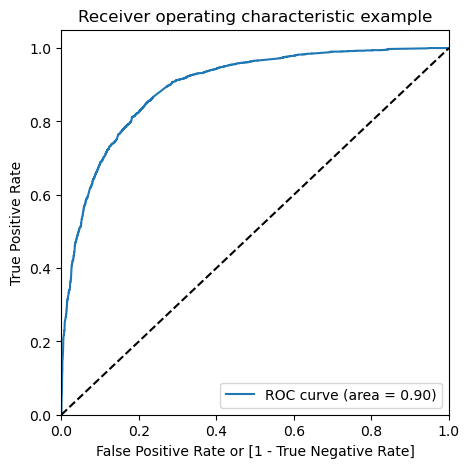

In [155]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

## Step 10 : Finding optimal cutoff Point

In [156]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted    ID  0.0  0.1  0.2  0.3  0.4  0.5  \
0          0         0.915281          1  4418    1    1    1    1    1    1   
1          0         0.142607          0  3517    1    1    0    0    0    0   
2          0         0.038008          0  4639    1    0    0    0    0    0   
3          0         0.106537          0  1904    1    1    0    0    0    0   
4          1         0.764905          1  3044    1    1    1    1    1    1   

   0.6  0.7  0.8  0.9  
0    1    1    1    1  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    1    1    0    0

In [157]:
# Lets calculate accuracy, sensitivity, and specificity for various probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385552  1.000000  0.000000
0.1   0.1  0.623342  0.978956  0.400203
0.2   0.2  0.772507  0.918656  0.680802
0.3   0.3  0.807146  0.851072  0.779584
0.4   0.4  0.814792  0.789559  0.830625
0.5   0.5  0.818848  0.714690  0.884205
0.6   0.6  0.811359  0.644678  0.915947
0.7   0.7  0.789047  0.538244  0.946420
0.8   0.8  0.765174  0.443950  0.966734
0.9   0.9  0.720549  0.297855  0.985780


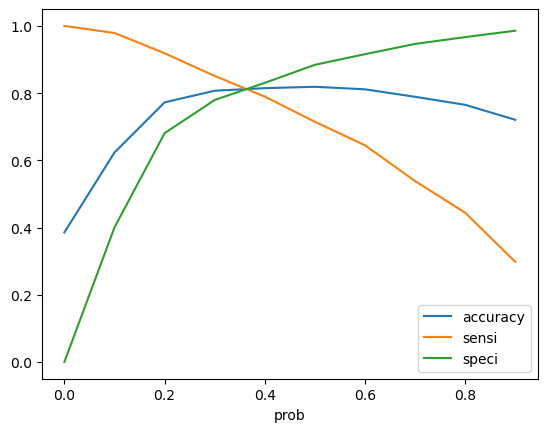

In [158]:
# Let's plot accuracy , sensitivity and specificity for various probabilities
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [159]:
# From the graph above ,optimal cut off  to take it as cutoff probability is at 0.35.

In [160]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

Converted  Conversion_Prob  Predicted    ID  0.0  0.1  0.2  0.3  0.4  0.5  \
0          0         0.915281          1  4418    1    1    1    1    1    1   
1          0         0.142607          0  3517    1    1    0    0    0    0   
2          0         0.038008          0  4639    1    0    0    0    0    0   
3          0         0.106537          0  1904    1    1    0    0    0    0   
4          1         0.764905          1  3044    1    1    1    1    1    1   

   0.6  0.7  0.8  0.9  final_predicted  
0    1    1    1    1                1  
1    0    0    0    0                0  
2    0    0    0    0                0  
3    0    0    0    0                0  
4    1    1    0    0                1

In [161]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.810578873459198

In [162]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3161,  777],
       [ 437, 2034]], dtype=int64)

In [163]:
# true positive
TP = confusion2[1,1]
# true negatives
TN = confusion2[0,0]
# false positives
FP = confusion2[0,1] 
# false negatives
FN = confusion2[1,0]

In [164]:
# Calculating the sensitivity
TP/float(TP+FN)

0.8231485228652368

In [165]:
# Calculating the specificity
TN/float(TN+FP)

0.8026917216861351

In [166]:
# positive predictive value 
print (TP / float(TP+FP))

0.7235859124866596


In [167]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8785436353529739


In [168]:
# Sensitivity: 82.31
# Specificity: 80.26

#### Precision and Recall 

In [169]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3482,  456],
       [ 705, 1766]], dtype=int64)

In [170]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7947794779477948

In [171]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7146904087414002

In [172]:
from sklearn.metrics import precision_score , recall_score

In [173]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.Predicted)

0.7947794779477948

In [174]:
recall_score(y_train_pred_final.Converted , y_train_pred_final.Predicted)

0.7146904087414002

#### Precision and recall tradeoff

In [175]:
from sklearn.metrics import precision_recall_curve

In [176]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       0
 4       1
 5       1
 6       0
 7       1
 8       0
 9       1
 10      0
 11      0
 12      1
 13      0
 14      0
 15      0
 16      0
 17      0
 18      0
 19      1
 20      0
 21      1
 22      0
 23      0
 24      0
 25      1
 26      1
 27      0
 28      0
 29      1
 30      0
 31      0
 32      0
 33      0
 34      0
 35      0
 36      0
 37      0
 38      0
 39      0
 40      0
 41      0
 42      0
 43      1
 44      0
 45      0
 46      0
 47      1
 48      1
 49      0
 50      1
 51      1
 52      1
 53      0
 54      0
 55      0
 56      0
 57      1
 58      1
 59      1
 60      0
 61      0
 62      0
 63      0
 64      1
 65      0
 66      1
 67      1
 68      0
 69      0
 70      1
 71      0
 72      0
 73      1
 74      0
 75      0
 76      0
 77      1
 78      0
 79      0
 80      1
 81      0
 82      0
 83      0
 84      0
 85      0
 86      0
 87      0
 88      0
 89      1
 90      1

In [177]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

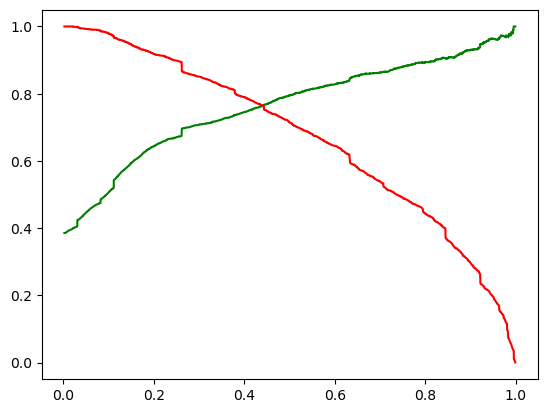

In [178]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [179]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted    ID  0.0  0.1  0.2  0.3  0.4  0.5  \
0          0         0.915281          1  4418    1    1    1    1    1    1   
1          0         0.142607          0  3517    1    1    0    0    0    0   
2          0         0.038008          0  4639    1    0    0    0    0    0   
3          0         0.106537          0  1904    1    1    0    0    0    0   
4          1         0.764905          1  3044    1    1    1    1    1    1   

   0.6  0.7  0.8  0.9  final_predicted  
0    1    1    1    1                1  
1    0    0    0    0                0  
2    0    0    0    0                0  
3    0    0    0    0                0  
4    1    1    0    0                1

In [180]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8166640661569667

In [181]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3314,  624],
       [ 551, 1920]], dtype=int64)

In [182]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [183]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7547169811320755

In [184]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7770133549170376

In [209]:
# Calculating the specificity
TN/float(TN+FP)


0.8415439309294058

In [210]:
# Calculating the sensitivity
TP/float(TP+FN)

0.7770133549170376

## Step 11 : Making Predictions on the test set

In [185]:
#Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [194]:
test_cols=X_train_3.columns[1:]

In [195]:
# Select the columns in X_train for X_test as well
X_test_final=X_test[test_cols] 

X_test_final=sm.add_constant(X_test_final)    

X_test_final.head()

const  Do Not Email  TotalVisits  Total Time Spent on Website  \
5499    1.0             1     0.529412                     0.573014   
6285    1.0             0     0.176471                     0.040834   
3474    1.0             0     0.000000                     0.000000   
6370    1.0             0     0.000000                     0.000000   
2545    1.0             0     0.176471                     0.586329   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
5499                                    1                          0   
6285                                    0                          0   
3474                                    0                          0   
6370                                    0                          0   
2545                                    1                          0   

      Lead Source_Olark Chat  Lead Source_Reference  \
5499                       0                      0   
6285                       0                      0   
3474                       1                      0   
6370                       1                      0   
2545                       0                      0   

      Last Activity_Olark Chat Conversation  Specialization_Missing  \
5499                                      0                       0   
6285                                      1                       1   
3474                                      1                       1   
6370                                      0                       1   
2545                                      0                       0   

      What is your current occupation_Missing  \
5499                                        0   
6285                                        0   
3474                                        1   
6370                                        0   
2545                                        1   

      What is your current occupation_Working Professional  \
5499                                                  0      
6285                                                  0      
3474                                                  0      
6370                                                  0      
2545                                                  0      

      Last Notable Activity_Other  Last Notable Activity_SMS Sent  
5499                            1                               0  
6285                            0                               0  
3474                            0                               0  
6370                            0                               1  
2545                            0                               0

In [197]:
X_test_final.shape

(2748, 14)

In [198]:
# Storing prediction of test set in the variable 'y_test_pred'
y_pred_test = logr3.predict(X_test_final)

In [199]:
# Creating a new dataset and saving the prediction values in it

y_test_pred_final=pd.DataFrame({'Converted':y_test.values,'Converted_Probability':y_pred_test,'ID':y_test.index})

y_test_pred_final.head()  

Converted  Converted_Probability    ID
5499          1               0.639760  5499
6285          0               0.031440  6285
3474          0               0.030778  3474
6370          1               0.632489  6370
2545          0               0.337093  2545

In [200]:
# Predicting the outcomes with probability cutoff as 0.42 by creating new columns in the final test dataset

y_test_pred_final['Predicted']=y_test_pred_final['Converted_Probability'].map(lambda x:1 if x >0.42 else 0 ) 

y_test_pred_final.head()

Converted  Converted_Probability    ID  Predicted
5499          1               0.639760  5499          1
6285          0               0.031440  6285          0
3474          0               0.030778  3474          0
6370          1               0.632489  6370          1
2545          0               0.337093  2545          0

In [201]:
# Creating confusion matrix to find precision and recall score

confusion_pr_test=confusion_matrix(y_test_pred_final.Converted,y_test_pred_final.Predicted)
confusion_pr_test

array([[1421,  273],
       [ 235,  819]], dtype=int64)

In [202]:
#Sensitivity score
Sensitivity_test =round((confusion_pr_test[1,1]/(confusion_pr_test[1,0]+confusion_pr_test[1,1])*100),2)  

#specificity score
Specificity_test =round((confusion_pr_test[0,0]/(confusion_pr_test[0,0]+confusion_pr_test[0,1])*100),2)  

#print both
print('Sensitivity:',Sensitivity_test)   
print('Specificity:',Specificity_test) 

Sensitivity: 77.7
Specificity: 83.88


In [203]:
#  Pecision score
Precision_test = round((confusion_pr_test[1,1]/(confusion_pr_test[0,1]+confusion_pr_test[1,1])*100),2)

#  Recall score
Recall_test = round((confusion_pr_test[1,1]/(confusion_pr_test[1,0]+confusion_pr_test[1,1])*100),2)

#print both
print('Precision:',Precision_test) 
print('Recall:',Recall_test)  

Precision: 75.0
Recall: 77.7


In [204]:
# Checking test set accuracy

Accuracy_test = round(metrics.accuracy_score(y_test_pred_final.Converted,y_test_pred_final.Predicted)*100,2)
print('Test set Accuracy:',Accuracy_test)

Test set Accuracy: 81.51


## Conclusion

### Valuable Insights -
- The Sensitivity and Specificity, Accuracy, Precision and Recall score we got from test set are almost accurate.
- Important features responsible for good conversion rate or the ones which contributes more towards the probability of a lead getting converted 
        in decreasing order:
    - Lead Origin_Lead Add Form
    - Total Time Spent on Website
    - What is your current occupation_Working Professional 
    - Last Notable Activity_Other
    - Last Notable Activity_SMS Sent 
    - Lead Source_Olark Chat
    - TotalVisits 
    
 Train Data : 
    
- Sensitivity: 77.7
- Specificity: 84.1   
- Precision: 75.47
- Recall: 77.7
- Test set Accuracy: 81.67

Test Data : 
    
- Sensitivity: 77.7
- Specificity: 83.88   
- Precision: 75.0
- Recall: 77.7
- Test set Accuracy: 81.51